In [1]:
pip install transformers==4.40.1

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install accelerate -U

Note: you may need to restart the kernel to use updated packages.


In [3]:
# pip uninstall torch torchvision torchaudio

In [4]:
pip install sentencepiece==0.1.94

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [7]:
from datasets import load_dataset

# Load your dataset
dataset = load_dataset('csv', data_files={'train': 'D://MASTERS//FinalThesis//textsumm-web//summ-frontend//app//python-scripts//pubmed_dataset//train.csv',
                                          'validation': 'D://MASTERS//FinalThesis//textsumm-web//summ-frontend//app//python-scripts//pubmed_dataset//validation.csv',
                                          'test': 'D://MASTERS//FinalThesis//textsumm-web//summ-frontend//app//python-scripts//pubmed_dataset//test.csv'})

# Example to see how the dataset looks
print(dataset['train'][0])


c:\Users\sanja\anaconda3\envs\cuda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'article': "a recent systematic analysis showed that in 2011 , 314 ( 296 - 331 ) million children younger than 5 years were mildly , moderately or severely stunted and 258 ( 240 - 274 ) million were mildly , moderately or severely underweight in the developing countries . \n in iran a study among 752 high school girls in sistan and baluchestan showed prevalence of 16.2% , 8.6% and 1.5% , for underweight , overweight and obesity , respectively . \n the prevalence of malnutrition among elementary school aged children in tehran varied from 6% to 16% . \n anthropometric study of elementary school students in shiraz revealed that 16% of them suffer from malnutrition and low body weight . \n snack should have 300 - 400 kcal energy and could provide 5 - 10 g of protein / day . nowadays , school nutrition programs are running as the national programs , world - wide . national school lunch program in the united states \n there are also some reports regarding school feeding programs in developi

In [8]:
import torch

In [9]:
print(torch.cuda.is_available())  # Should return True if CUDA is enabled and available
print(torch.cuda.get_device_name(0))

True
NVIDIA GeForce GTX 1660 Ti


In [10]:
import torch 

# Limit PyTorch to use only 50% of the available GPU memory
torch.cuda.set_per_process_memory_fraction(0.8, device=0)

In [11]:
pip list

Package             Version
------------------- ------------
absl-py             2.1.0
accelerate          0.33.0
aiohappyeyeballs    2.4.0
aiohttp             3.10.5
aiosignal           1.3.1
annotated-types     0.7.0
anyio               4.4.0
asttokens           2.4.1
async-timeout       4.0.3
attrs               24.2.0
backcall            0.2.0
certifi             2024.7.4
charset-normalizer  3.3.2
click               8.1.7
colorama            0.4.6
comm                0.2.2
contourpy           1.1.1
cycler              0.12.1
datasets            2.21.0
debugpy             1.6.7
decorator           5.1.1
dill                0.3.8
exceptiongroup      1.2.2
executing           2.0.1
fastapi             0.112.1
filelock            3.15.4
fonttools           4.53.1
frozenlist          1.4.1
fsspec              2024.6.1
graphviz            0.20.3
h11                 0.14.0
huggingface-hub     0.24.6
idna                3.7
importlib_metadata  8.4.0
importlib_resources 6.4.4
ipykernel    

In [12]:
pip cache purge

Files removed: 2
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
def filter_empty(examples):
    return examples['article'] is not None and examples['abstract'] is not None
        
filtered_dataset = dataset.filter(filter_empty)

In [16]:
# Function to calculate lengths of articles and abstracts
def calculate_lengths(dataset, column_name):
    return [len(item[column_name].split()) for item in dataset]


In [17]:
# Get lengths of articles and abstracts for the training set
train_article_lengths = calculate_lengths(filtered_dataset['train'], 'article')
train_abstract_lengths = calculate_lengths(filtered_dataset['train'], 'abstract')

# Get lengths of articles and abstracts for the validation set
val_article_lengths = calculate_lengths(filtered_dataset['validation'], 'article')
val_abstract_lengths = calculate_lengths(filtered_dataset['validation'], 'abstract')


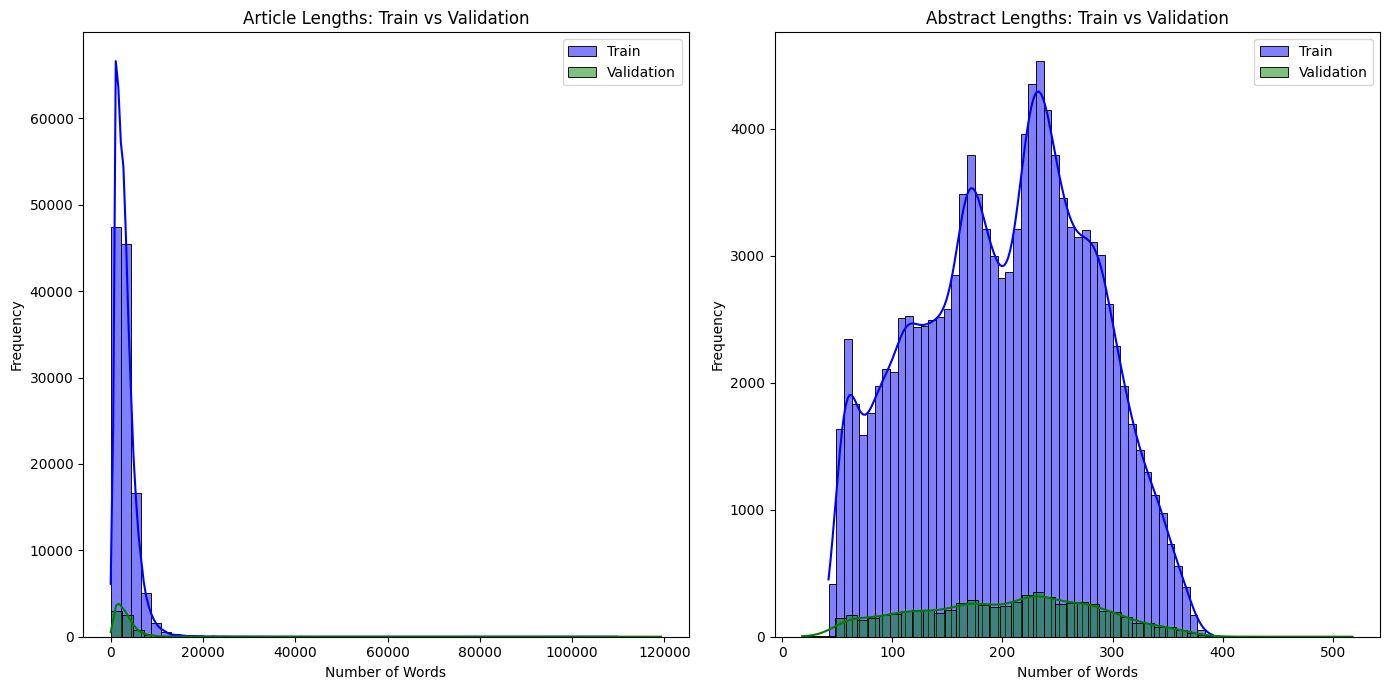

In [18]:
# Calculate lengths for validation set
val_article_lengths = calculate_lengths(dataset['validation'], 'article')
val_abstract_lengths = calculate_lengths(dataset['validation'], 'abstract')

plt.figure(figsize=(14, 7))

# Plot article lengths comparison
plt.subplot(1, 2, 1)
sns.histplot(train_article_lengths, color='blue', label='Train', kde=True, bins=50)
sns.histplot(val_article_lengths, color='green', label='Validation', kde=True, bins=50)
plt.title('Article Lengths: Train vs Validation')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()

# Plot abstract lengths comparison
plt.subplot(1, 2, 2)
sns.histplot(train_abstract_lengths, color='blue', label='Train', kde=True, bins=50)
sns.histplot(val_abstract_lengths, color='green', label='Validation', kde=True, bins=50)
plt.title('Abstract Lengths: Train vs Validation')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


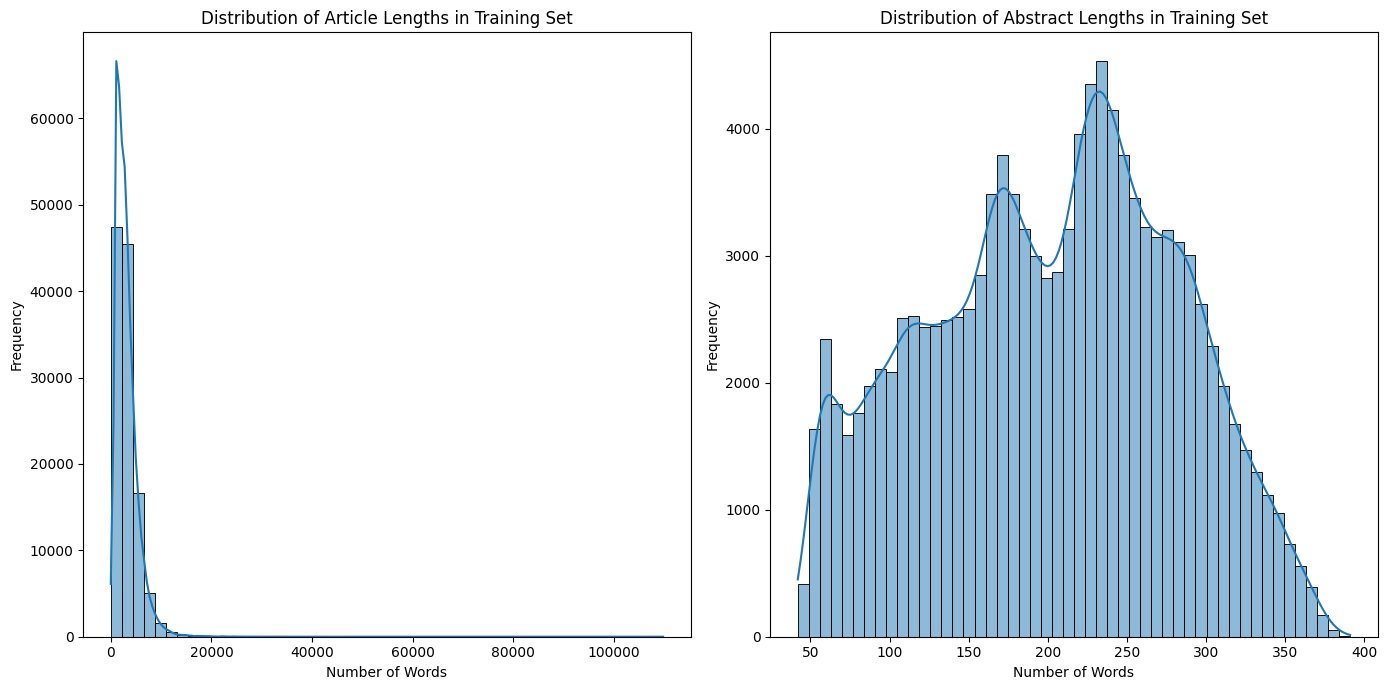

In [19]:
plt.figure(figsize=(14, 7))

# Plot article lengths for the training set
plt.subplot(1, 2, 1)
sns.histplot(train_article_lengths, bins=50, kde=True)
plt.title('Distribution of Article Lengths in Training Set')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Plot abstract lengths for the training set
plt.subplot(1, 2, 2)
sns.histplot(train_abstract_lengths, bins=50, kde=True)
plt.title('Distribution of Abstract Lengths in Training Set')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [20]:
import json

from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config

display_architecture=True

model = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5Tokenizer.from_pretrained('t5-small')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the device
model = model.to(device)


c:\Users\sanja\anaconda3\envs\cuda\lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [21]:
pip install absl-py

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install rouge-score


Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
from datasets import load_dataset, load_metric


from tabulate import tabulate
test_articles  = dataset['test']['article']
test_abstracts = dataset['test']['abstract']

# Use only a subset of 1,000 samples (for quicker evaluation)
subset_size = min(1000, len(test_articles))
test_articles_subset = test_articles[:subset_size]
test_abstracts_subset = test_abstracts[:subset_size]

# Generate predictions
predictions = []
for article in test_articles_subset:
    input_ids = tokenizer.encode("summarize: " + article, return_tensors="pt", max_length=512, truncation=True).to(device)
    outputs = model.generate(input_ids, max_length=100, num_beams=2, early_stopping=True)
    pred_summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    predictions.append(pred_summary)

# Evaluate using ROUGE metric with `trust_remote_code=True`
rouge = load_metric("rouge", trust_remote_code=True)
results = rouge.compute(predictions=predictions, references=test_abstracts_subset)

# Prepare data for the table
table_data = [
    ["ROUGE-1", results['rouge1'].mid.precision, results['rouge1'].mid.recall, results['rouge1'].mid.fmeasure],
    ["ROUGE-2", results['rouge2'].mid.precision, results['rouge2'].mid.recall, results['rouge2'].mid.fmeasure],
    ["ROUGE-L", results['rougeL'].mid.precision, results['rougeL'].mid.recall, results['rougeL'].mid.fmeasure]
]

# Define table headers
headers = ["Metric", "Precision", "Recall", "F1-score"]

# Display the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))


C:\Users\sanja\AppData\Local\Temp\ipykernel_17780\2260095638.py:23: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge = load_metric("rouge", trust_remote_code=True)


+----------+-------------+-----------+------------+
| Metric   |   Precision |    Recall |   F1-score |
+==========+=============+===========+============+
| ROUGE-1  |    0.454776 | 0.143103  |  0.206228  |
+----------+-------------+-----------+------------+
| ROUGE-2  |    0.152374 | 0.0467351 |  0.0679219 |
+----------+-------------+-----------+------------+
| ROUGE-L  |    0.316835 | 0.0984887 |  0.142301  |
+----------+-------------+-----------+------------+


In [26]:
def preprocess_function(examples):
    # inputs = ["summarize: " + (doc if doc else "") for doc in examples['article']] #skipping empty values
    inputs = ["summarize: " + doc for doc in examples['article']]
    model_inputs = tokenizer(inputs, max_length=512, truncation=True, padding="max_length")

    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples['abstract'], max_length=128, truncation=True, padding="max_length")

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [27]:
import os
from datasets import load_from_disk, DatasetDict

# Define the path where the tokenized dataset is saved
tokenized_dataset_path = "D://MASTERS//FinalThesis//textsumm-web//summ-frontend//app//python-scripts//tokenized_dataset"

# Check if the tokenized dataset is already present
if os.path.exists(tokenized_dataset_path):
    # Load the tokenized dataset from disk
    tokenized_datasets = load_from_disk(tokenized_dataset_path)
    print("Loaded tokenized dataset from disk.")
else:
    # Tokenize the dataset
    tokenized_datasets = filtered_dataset.map(preprocess_function, batched=True)
    
    # Save the tokenized dataset to disk
    tokenized_datasets.save_to_disk(tokenized_dataset_path)
    print("Tokenized dataset saved to disk.")

Loaded tokenized dataset from disk.


In [28]:
import torch 

torch.cuda.empty_cache()


In [29]:
import os

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"


In [30]:
print(tokenized_datasets["validation"][0])

{'article': "venous thromboembolism ( vte ) comprising of deep vein thrombosis ( dvt ) and pulmonary embolism ( pe ) can result in significant mortality , morbidity , and healthcare expenditure . \n approximately , one - third of patients with symptomatic vte manifests pe , whereas two - thirds manifest dvt alone . \n both dvt and pe can be clinically silent ( asymptomatic ) and hence not suspected . \n if undiagnosed , asymptomatic vte can lead to chronic venous disease or recurrent vte and long - term debilitating sequelae such as postthrombotic syndrome and chronic thromboembolic pulmonary hypertension . \n vte is not only disabling but also prolongs hospital stay and increases the cost of treatment . \n along with myocardial infarction and arrhythmia ( due to electrolyte imbalance ) , pe is one of the commonest causes of sudden unexplained deaths in hospitalized patients . \n it is estimated that 20 million cases of lower extremity dvt occur in the usa alone . \n the prevailing not

In [31]:
from transformers import Trainer, TrainingArguments
 
 # Reduce the datasets to 50,000 samples each
train_subset = tokenized_datasets["train"].select(range(5000)) 

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    num_train_epochs=5,
    weight_decay=0.01,
    save_total_limit=1,
    gradient_accumulation_steps=4,  # Accumulate gradients over 4 steps
    logging_dir='D://MASTERS//FinalThesis//textsumm-web//summ-frontend//app//python-scripts//logs',  # Add this line to specify the logging directory
    logging_steps=10,
)

# print(model)
# Initialize the Trainer
trainer = Trainer(
    model=model.to('cuda'),
    args=training_args,
    train_dataset=train_subset,
    eval_dataset=tokenized_datasets["validation"],
)

# Start the fine-tuning
trainer.train()


  0%|          | 10/3125 [00:05<26:27,  1.96it/s]

{'loss': 4.7726, 'grad_norm': 7.275379180908203, 'learning_rate': 4.9840000000000004e-05, 'epoch': 0.02}


  1%|          | 20/3125 [00:10<26:12,  1.97it/s]

{'loss': 3.959, 'grad_norm': 5.361027717590332, 'learning_rate': 4.9680000000000005e-05, 'epoch': 0.03}


  1%|          | 30/3125 [00:15<26:12,  1.97it/s]

{'loss': 3.3942, 'grad_norm': 3.5921363830566406, 'learning_rate': 4.952e-05, 'epoch': 0.05}


  1%|▏         | 40/3125 [00:20<26:07,  1.97it/s]

{'loss': 3.4437, 'grad_norm': 1.4220582246780396, 'learning_rate': 4.936e-05, 'epoch': 0.06}


  2%|▏         | 50/3125 [00:25<26:05,  1.96it/s]

{'loss': 3.2894, 'grad_norm': 1.4216556549072266, 'learning_rate': 4.92e-05, 'epoch': 0.08}


  2%|▏         | 60/3125 [00:30<26:04,  1.96it/s]

{'loss': 3.1889, 'grad_norm': 3.057859182357788, 'learning_rate': 4.9040000000000005e-05, 'epoch': 0.1}


  2%|▏         | 70/3125 [00:36<26:04,  1.95it/s]

{'loss': 3.1588, 'grad_norm': 2.205378293991089, 'learning_rate': 4.8880000000000006e-05, 'epoch': 0.11}


  3%|▎         | 80/3125 [00:41<25:58,  1.95it/s]

{'loss': 3.1336, 'grad_norm': 1.5813758373260498, 'learning_rate': 4.872000000000001e-05, 'epoch': 0.13}


  3%|▎         | 90/3125 [00:46<26:30,  1.91it/s]

{'loss': 3.1741, 'grad_norm': 1.1323354244232178, 'learning_rate': 4.856e-05, 'epoch': 0.14}


  3%|▎         | 100/3125 [00:51<25:56,  1.94it/s]

{'loss': 2.8864, 'grad_norm': 1.8034409284591675, 'learning_rate': 4.8400000000000004e-05, 'epoch': 0.16}


  4%|▎         | 110/3125 [00:56<25:51,  1.94it/s]

{'loss': 2.952, 'grad_norm': 1.4766623973846436, 'learning_rate': 4.824e-05, 'epoch': 0.18}


  4%|▍         | 120/3125 [01:02<25:52,  1.94it/s]

{'loss': 2.9099, 'grad_norm': 1.6180967092514038, 'learning_rate': 4.808e-05, 'epoch': 0.19}


  4%|▍         | 130/3125 [01:07<25:46,  1.94it/s]

{'loss': 3.0339, 'grad_norm': 1.1955804824829102, 'learning_rate': 4.792e-05, 'epoch': 0.21}


  4%|▍         | 140/3125 [01:12<25:43,  1.93it/s]

{'loss': 3.0514, 'grad_norm': 1.4370862245559692, 'learning_rate': 4.7760000000000004e-05, 'epoch': 0.22}


  5%|▍         | 150/3125 [01:17<25:41,  1.93it/s]

{'loss': 3.0099, 'grad_norm': 1.2040241956710815, 'learning_rate': 4.76e-05, 'epoch': 0.24}


  5%|▌         | 160/3125 [01:22<25:32,  1.93it/s]

{'loss': 3.0029, 'grad_norm': 3.36954402923584, 'learning_rate': 4.744e-05, 'epoch': 0.26}


  5%|▌         | 170/3125 [01:28<25:42,  1.92it/s]

{'loss': 2.9387, 'grad_norm': 2.398134469985962, 'learning_rate': 4.728e-05, 'epoch': 0.27}


  6%|▌         | 180/3125 [01:33<25:54,  1.89it/s]

{'loss': 3.0782, 'grad_norm': 1.2426323890686035, 'learning_rate': 4.712e-05, 'epoch': 0.29}


  6%|▌         | 190/3125 [01:38<25:48,  1.89it/s]

{'loss': 2.9584, 'grad_norm': 1.4906309843063354, 'learning_rate': 4.6960000000000004e-05, 'epoch': 0.3}


  6%|▋         | 200/3125 [01:43<25:42,  1.90it/s]

{'loss': 2.9706, 'grad_norm': 2.2687828540802, 'learning_rate': 4.6800000000000006e-05, 'epoch': 0.32}


  7%|▋         | 210/3125 [01:49<25:59,  1.87it/s]

{'loss': 2.8814, 'grad_norm': 1.4328899383544922, 'learning_rate': 4.664e-05, 'epoch': 0.34}


  7%|▋         | 220/3125 [01:54<25:45,  1.88it/s]

{'loss': 2.953, 'grad_norm': 1.7118066549301147, 'learning_rate': 4.648e-05, 'epoch': 0.35}


  7%|▋         | 230/3125 [01:59<25:56,  1.86it/s]

{'loss': 2.8504, 'grad_norm': 1.4027682542800903, 'learning_rate': 4.6320000000000004e-05, 'epoch': 0.37}


  8%|▊         | 240/3125 [02:05<25:32,  1.88it/s]

{'loss': 2.9411, 'grad_norm': 2.3913745880126953, 'learning_rate': 4.6160000000000005e-05, 'epoch': 0.38}


  8%|▊         | 250/3125 [02:10<25:37,  1.87it/s]

{'loss': 3.0885, 'grad_norm': 1.4783949851989746, 'learning_rate': 4.600000000000001e-05, 'epoch': 0.4}


  8%|▊         | 260/3125 [02:15<25:46,  1.85it/s]

{'loss': 2.7913, 'grad_norm': 1.1733518838882446, 'learning_rate': 4.584e-05, 'epoch': 0.42}


  9%|▊         | 270/3125 [02:21<25:23,  1.87it/s]

{'loss': 3.0131, 'grad_norm': 1.7261652946472168, 'learning_rate': 4.568e-05, 'epoch': 0.43}


  9%|▉         | 280/3125 [02:26<25:44,  1.84it/s]

{'loss': 2.9022, 'grad_norm': 1.7624292373657227, 'learning_rate': 4.5520000000000005e-05, 'epoch': 0.45}


  9%|▉         | 290/3125 [02:32<25:14,  1.87it/s]

{'loss': 2.8249, 'grad_norm': 1.3382694721221924, 'learning_rate': 4.536e-05, 'epoch': 0.46}


 10%|▉         | 300/3125 [02:37<25:44,  1.83it/s]

{'loss': 3.017, 'grad_norm': 1.3102511167526245, 'learning_rate': 4.52e-05, 'epoch': 0.48}


 10%|▉         | 310/3125 [02:42<25:27,  1.84it/s]

{'loss': 2.8546, 'grad_norm': 1.746452808380127, 'learning_rate': 4.504e-05, 'epoch': 0.5}


 10%|█         | 320/3125 [02:48<25:21,  1.84it/s]

{'loss': 2.8435, 'grad_norm': 2.500717878341675, 'learning_rate': 4.488e-05, 'epoch': 0.51}


 11%|█         | 330/3125 [02:53<25:14,  1.85it/s]

{'loss': 2.8953, 'grad_norm': 1.2127875089645386, 'learning_rate': 4.472e-05, 'epoch': 0.53}


 11%|█         | 340/3125 [02:59<24:55,  1.86it/s]

{'loss': 2.9589, 'grad_norm': 2.073690891265869, 'learning_rate': 4.456e-05, 'epoch': 0.54}


 11%|█         | 350/3125 [03:04<24:59,  1.85it/s]

{'loss': 2.94, 'grad_norm': 1.5480388402938843, 'learning_rate': 4.44e-05, 'epoch': 0.56}


 12%|█▏        | 360/3125 [03:10<24:53,  1.85it/s]

{'loss': 2.9151, 'grad_norm': 1.3639991283416748, 'learning_rate': 4.424e-05, 'epoch': 0.58}


 12%|█▏        | 370/3125 [03:15<24:54,  1.84it/s]

{'loss': 2.7652, 'grad_norm': 1.1713106632232666, 'learning_rate': 4.4080000000000005e-05, 'epoch': 0.59}


 12%|█▏        | 380/3125 [03:20<24:56,  1.83it/s]

{'loss': 2.8776, 'grad_norm': 1.1921494007110596, 'learning_rate': 4.392e-05, 'epoch': 0.61}


 12%|█▏        | 390/3125 [03:26<24:41,  1.85it/s]

{'loss': 2.8313, 'grad_norm': 1.0898758172988892, 'learning_rate': 4.376e-05, 'epoch': 0.62}


 13%|█▎        | 400/3125 [03:31<24:51,  1.83it/s]

{'loss': 2.8673, 'grad_norm': 1.1843688488006592, 'learning_rate': 4.36e-05, 'epoch': 0.64}


 13%|█▎        | 410/3125 [03:37<24:34,  1.84it/s]

{'loss': 2.8434, 'grad_norm': 1.1835193634033203, 'learning_rate': 4.3440000000000004e-05, 'epoch': 0.66}


 13%|█▎        | 420/3125 [03:42<24:39,  1.83it/s]

{'loss': 2.9755, 'grad_norm': 1.6242703199386597, 'learning_rate': 4.3280000000000006e-05, 'epoch': 0.67}


 14%|█▍        | 430/3125 [03:48<24:34,  1.83it/s]

{'loss': 2.8914, 'grad_norm': 1.5451040267944336, 'learning_rate': 4.312000000000001e-05, 'epoch': 0.69}


 14%|█▍        | 440/3125 [03:53<24:16,  1.84it/s]

{'loss': 2.6548, 'grad_norm': 2.310159683227539, 'learning_rate': 4.296e-05, 'epoch': 0.7}


 14%|█▍        | 450/3125 [03:59<24:19,  1.83it/s]

{'loss': 2.9421, 'grad_norm': 1.1779106855392456, 'learning_rate': 4.2800000000000004e-05, 'epoch': 0.72}


 15%|█▍        | 460/3125 [04:04<24:12,  1.83it/s]

{'loss': 2.9609, 'grad_norm': 1.5253782272338867, 'learning_rate': 4.2640000000000005e-05, 'epoch': 0.74}


 15%|█▌        | 470/3125 [04:10<24:00,  1.84it/s]

{'loss': 2.7475, 'grad_norm': 1.2093318700790405, 'learning_rate': 4.248e-05, 'epoch': 0.75}


 15%|█▌        | 480/3125 [04:15<23:55,  1.84it/s]

{'loss': 2.7521, 'grad_norm': 1.3267183303833008, 'learning_rate': 4.232e-05, 'epoch': 0.77}


 16%|█▌        | 490/3125 [04:20<23:55,  1.84it/s]

{'loss': 2.8173, 'grad_norm': 1.605628490447998, 'learning_rate': 4.2159999999999996e-05, 'epoch': 0.78}


 16%|█▌        | 500/3125 [04:26<23:52,  1.83it/s]

{'loss': 2.9221, 'grad_norm': 1.027442216873169, 'learning_rate': 4.2e-05, 'epoch': 0.8}


 16%|█▋        | 510/3125 [04:33<24:15,  1.80it/s]

{'loss': 2.8748, 'grad_norm': 1.0546684265136719, 'learning_rate': 4.184e-05, 'epoch': 0.82}


 17%|█▋        | 520/3125 [04:38<23:31,  1.85it/s]

{'loss': 2.8036, 'grad_norm': 1.3238308429718018, 'learning_rate': 4.168e-05, 'epoch': 0.83}


 17%|█▋        | 530/3125 [04:44<23:25,  1.85it/s]

{'loss': 2.8036, 'grad_norm': 1.9660931825637817, 'learning_rate': 4.152e-05, 'epoch': 0.85}


 17%|█▋        | 540/3125 [04:49<23:31,  1.83it/s]

{'loss': 2.7522, 'grad_norm': 1.0974833965301514, 'learning_rate': 4.1360000000000004e-05, 'epoch': 0.86}


 18%|█▊        | 550/3125 [04:55<23:25,  1.83it/s]

{'loss': 2.9662, 'grad_norm': 1.1559498310089111, 'learning_rate': 4.12e-05, 'epoch': 0.88}


 18%|█▊        | 560/3125 [05:00<23:15,  1.84it/s]

{'loss': 2.8168, 'grad_norm': 0.9751479029655457, 'learning_rate': 4.104e-05, 'epoch': 0.9}


 18%|█▊        | 570/3125 [05:06<23:15,  1.83it/s]

{'loss': 2.7376, 'grad_norm': 1.1581820249557495, 'learning_rate': 4.088e-05, 'epoch': 0.91}


 19%|█▊        | 580/3125 [05:11<23:11,  1.83it/s]

{'loss': 2.8735, 'grad_norm': 2.18558406829834, 'learning_rate': 4.072e-05, 'epoch': 0.93}


 19%|█▉        | 590/3125 [05:16<23:07,  1.83it/s]

{'loss': 2.7805, 'grad_norm': 3.171903610229492, 'learning_rate': 4.0560000000000005e-05, 'epoch': 0.94}


 19%|█▉        | 600/3125 [05:22<23:04,  1.82it/s]

{'loss': 2.8643, 'grad_norm': 1.2482985258102417, 'learning_rate': 4.0400000000000006e-05, 'epoch': 0.96}


 20%|█▉        | 610/3125 [05:27<23:11,  1.81it/s]

{'loss': 2.7483, 'grad_norm': 1.2262874841690063, 'learning_rate': 4.024e-05, 'epoch': 0.98}


 20%|█▉        | 620/3125 [05:33<22:49,  1.83it/s]

{'loss': 2.9536, 'grad_norm': 1.1158008575439453, 'learning_rate': 4.008e-05, 'epoch': 0.99}


                                                  
 20%|██        | 625/3125 [08:12<22:51,  1.82it/s] 

{'eval_loss': 2.562150716781616, 'eval_runtime': 156.7272, 'eval_samples_per_second': 42.322, 'eval_steps_per_second': 21.164, 'epoch': 1.0}


 20%|██        | 630/3125 [08:15<8:12:20, 11.84s/it] 

{'loss': 2.8062, 'grad_norm': 1.6094799041748047, 'learning_rate': 3.9920000000000004e-05, 'epoch': 1.01}


 20%|██        | 640/3125 [08:21<35:47,  1.16it/s]  

{'loss': 2.923, 'grad_norm': 1.2432451248168945, 'learning_rate': 3.9760000000000006e-05, 'epoch': 1.02}


 21%|██        | 650/3125 [08:26<22:57,  1.80it/s]

{'loss': 2.7105, 'grad_norm': 1.2034324407577515, 'learning_rate': 3.960000000000001e-05, 'epoch': 1.04}


 21%|██        | 660/3125 [08:32<22:42,  1.81it/s]

{'loss': 2.8207, 'grad_norm': 1.3654255867004395, 'learning_rate': 3.944e-05, 'epoch': 1.06}


 21%|██▏       | 670/3125 [08:37<22:40,  1.80it/s]

{'loss': 2.6629, 'grad_norm': 1.5481432676315308, 'learning_rate': 3.9280000000000003e-05, 'epoch': 1.07}


 22%|██▏       | 680/3125 [08:43<22:32,  1.81it/s]

{'loss': 2.7327, 'grad_norm': 1.4840432405471802, 'learning_rate': 3.912e-05, 'epoch': 1.09}


 22%|██▏       | 690/3125 [08:48<22:31,  1.80it/s]

{'loss': 2.7664, 'grad_norm': 1.169969081878662, 'learning_rate': 3.896e-05, 'epoch': 1.1}


 22%|██▏       | 700/3125 [08:54<22:24,  1.80it/s]

{'loss': 2.812, 'grad_norm': 1.0444684028625488, 'learning_rate': 3.88e-05, 'epoch': 1.12}


 23%|██▎       | 710/3125 [08:59<22:24,  1.80it/s]

{'loss': 2.7081, 'grad_norm': 1.3436689376831055, 'learning_rate': 3.864e-05, 'epoch': 1.14}


 23%|██▎       | 720/3125 [09:05<22:13,  1.80it/s]

{'loss': 2.8029, 'grad_norm': 1.1544523239135742, 'learning_rate': 3.848e-05, 'epoch': 1.15}


 23%|██▎       | 730/3125 [09:10<22:07,  1.80it/s]

{'loss': 2.7018, 'grad_norm': 1.587976098060608, 'learning_rate': 3.832e-05, 'epoch': 1.17}


 24%|██▎       | 740/3125 [09:16<21:46,  1.83it/s]

{'loss': 2.8558, 'grad_norm': 1.1866923570632935, 'learning_rate': 3.816e-05, 'epoch': 1.18}


 24%|██▍       | 750/3125 [09:21<21:50,  1.81it/s]

{'loss': 2.7912, 'grad_norm': 2.806462287902832, 'learning_rate': 3.8e-05, 'epoch': 1.2}


 24%|██▍       | 760/3125 [09:27<21:40,  1.82it/s]

{'loss': 2.7373, 'grad_norm': 1.8921972513198853, 'learning_rate': 3.7840000000000004e-05, 'epoch': 1.22}


 25%|██▍       | 770/3125 [09:32<21:29,  1.83it/s]

{'loss': 2.9198, 'grad_norm': 1.3260607719421387, 'learning_rate': 3.7680000000000005e-05, 'epoch': 1.23}


 25%|██▍       | 780/3125 [09:38<21:35,  1.81it/s]

{'loss': 2.7688, 'grad_norm': 1.0716122388839722, 'learning_rate': 3.752e-05, 'epoch': 1.25}


 25%|██▌       | 790/3125 [09:43<21:17,  1.83it/s]

{'loss': 2.7411, 'grad_norm': 1.5537644624710083, 'learning_rate': 3.736e-05, 'epoch': 1.26}


 26%|██▌       | 800/3125 [09:49<21:33,  1.80it/s]

{'loss': 2.9993, 'grad_norm': 1.148362398147583, 'learning_rate': 3.72e-05, 'epoch': 1.28}


 26%|██▌       | 810/3125 [09:54<21:18,  1.81it/s]

{'loss': 2.715, 'grad_norm': 3.521437883377075, 'learning_rate': 3.7040000000000005e-05, 'epoch': 1.3}


 26%|██▌       | 820/3125 [10:00<21:07,  1.82it/s]

{'loss': 2.7741, 'grad_norm': 1.1158077716827393, 'learning_rate': 3.6880000000000006e-05, 'epoch': 1.31}


 27%|██▋       | 830/3125 [10:05<21:08,  1.81it/s]

{'loss': 2.8635, 'grad_norm': 1.481096625328064, 'learning_rate': 3.672000000000001e-05, 'epoch': 1.33}


 27%|██▋       | 840/3125 [10:11<21:03,  1.81it/s]

{'loss': 2.6001, 'grad_norm': 1.259059190750122, 'learning_rate': 3.656e-05, 'epoch': 1.34}


 27%|██▋       | 850/3125 [10:17<20:58,  1.81it/s]

{'loss': 2.6629, 'grad_norm': 1.3398970365524292, 'learning_rate': 3.6400000000000004e-05, 'epoch': 1.36}


 28%|██▊       | 860/3125 [10:22<20:40,  1.83it/s]

{'loss': 2.5829, 'grad_norm': 3.9346628189086914, 'learning_rate': 3.624e-05, 'epoch': 1.38}


 28%|██▊       | 870/3125 [10:28<20:57,  1.79it/s]

{'loss': 2.6475, 'grad_norm': 1.085599422454834, 'learning_rate': 3.608e-05, 'epoch': 1.39}


 28%|██▊       | 880/3125 [10:33<20:36,  1.82it/s]

{'loss': 2.8598, 'grad_norm': 1.1211844682693481, 'learning_rate': 3.592e-05, 'epoch': 1.41}


 28%|██▊       | 890/3125 [10:39<20:23,  1.83it/s]

{'loss': 2.6766, 'grad_norm': 1.2050672769546509, 'learning_rate': 3.5759999999999996e-05, 'epoch': 1.42}


 29%|██▉       | 900/3125 [10:44<20:27,  1.81it/s]

{'loss': 2.5863, 'grad_norm': 1.2228074073791504, 'learning_rate': 3.56e-05, 'epoch': 1.44}


 29%|██▉       | 910/3125 [10:50<20:15,  1.82it/s]

{'loss': 2.6825, 'grad_norm': 1.2848483324050903, 'learning_rate': 3.544e-05, 'epoch': 1.46}


 29%|██▉       | 920/3125 [10:55<20:16,  1.81it/s]

{'loss': 2.9021, 'grad_norm': 1.292917251586914, 'learning_rate': 3.528e-05, 'epoch': 1.47}


 30%|██▉       | 930/3125 [11:01<20:00,  1.83it/s]

{'loss': 2.7531, 'grad_norm': 1.111853003501892, 'learning_rate': 3.512e-05, 'epoch': 1.49}


 30%|███       | 940/3125 [11:06<20:09,  1.81it/s]

{'loss': 2.6962, 'grad_norm': 1.1948915719985962, 'learning_rate': 3.4960000000000004e-05, 'epoch': 1.5}


 30%|███       | 950/3125 [11:12<20:06,  1.80it/s]

{'loss': 2.7649, 'grad_norm': 1.1012275218963623, 'learning_rate': 3.48e-05, 'epoch': 1.52}


 31%|███       | 960/3125 [11:17<19:56,  1.81it/s]

{'loss': 2.5768, 'grad_norm': 1.2279491424560547, 'learning_rate': 3.464e-05, 'epoch': 1.54}


 31%|███       | 970/3125 [11:23<19:46,  1.82it/s]

{'loss': 2.7736, 'grad_norm': 1.6804254055023193, 'learning_rate': 3.448e-05, 'epoch': 1.55}


 31%|███▏      | 980/3125 [11:28<19:45,  1.81it/s]

{'loss': 2.6743, 'grad_norm': 1.2709121704101562, 'learning_rate': 3.4320000000000003e-05, 'epoch': 1.57}


 32%|███▏      | 990/3125 [11:34<19:47,  1.80it/s]

{'loss': 2.654, 'grad_norm': 1.093516230583191, 'learning_rate': 3.4160000000000005e-05, 'epoch': 1.58}


 32%|███▏      | 1000/3125 [11:39<19:34,  1.81it/s]

{'loss': 2.9122, 'grad_norm': 1.1058275699615479, 'learning_rate': 3.4000000000000007e-05, 'epoch': 1.6}


 32%|███▏      | 1010/3125 [11:46<19:54,  1.77it/s]

{'loss': 2.7214, 'grad_norm': 1.2426583766937256, 'learning_rate': 3.384e-05, 'epoch': 1.62}


 33%|███▎      | 1020/3125 [11:52<19:12,  1.83it/s]

{'loss': 2.8185, 'grad_norm': 1.175621747970581, 'learning_rate': 3.368e-05, 'epoch': 1.63}


 33%|███▎      | 1030/3125 [11:57<19:17,  1.81it/s]

{'loss': 2.7961, 'grad_norm': 2.060825824737549, 'learning_rate': 3.3520000000000004e-05, 'epoch': 1.65}


 33%|███▎      | 1040/3125 [12:03<19:17,  1.80it/s]

{'loss': 2.6791, 'grad_norm': 1.1183297634124756, 'learning_rate': 3.336e-05, 'epoch': 1.66}


 34%|███▎      | 1050/3125 [12:08<18:55,  1.83it/s]

{'loss': 2.7465, 'grad_norm': 1.218802571296692, 'learning_rate': 3.32e-05, 'epoch': 1.68}


 34%|███▍      | 1060/3125 [12:14<19:07,  1.80it/s]

{'loss': 2.5883, 'grad_norm': 1.1110402345657349, 'learning_rate': 3.304e-05, 'epoch': 1.7}


 34%|███▍      | 1070/3125 [12:19<18:59,  1.80it/s]

{'loss': 2.7678, 'grad_norm': 1.2919697761535645, 'learning_rate': 3.288e-05, 'epoch': 1.71}


 35%|███▍      | 1080/3125 [12:25<18:38,  1.83it/s]

{'loss': 2.6112, 'grad_norm': 1.3287353515625, 'learning_rate': 3.272e-05, 'epoch': 1.73}


 35%|███▍      | 1090/3125 [12:30<18:56,  1.79it/s]

{'loss': 2.7711, 'grad_norm': 1.0927252769470215, 'learning_rate': 3.256e-05, 'epoch': 1.74}


 35%|███▌      | 1100/3125 [12:36<18:28,  1.83it/s]

{'loss': 2.8387, 'grad_norm': 1.6044474840164185, 'learning_rate': 3.24e-05, 'epoch': 1.76}


 36%|███▌      | 1110/3125 [12:42<18:28,  1.82it/s]

{'loss': 2.7426, 'grad_norm': 1.183977723121643, 'learning_rate': 3.224e-05, 'epoch': 1.78}


 36%|███▌      | 1120/3125 [12:47<18:29,  1.81it/s]

{'loss': 2.6657, 'grad_norm': 1.3060652017593384, 'learning_rate': 3.208e-05, 'epoch': 1.79}


 36%|███▌      | 1130/3125 [12:53<18:25,  1.80it/s]

{'loss': 2.662, 'grad_norm': 1.0603909492492676, 'learning_rate': 3.192e-05, 'epoch': 1.81}


 36%|███▋      | 1140/3125 [12:58<18:11,  1.82it/s]

{'loss': 2.6685, 'grad_norm': 1.4407336711883545, 'learning_rate': 3.176e-05, 'epoch': 1.82}


 37%|███▋      | 1150/3125 [13:04<18:07,  1.82it/s]

{'loss': 2.6918, 'grad_norm': 1.429506778717041, 'learning_rate': 3.16e-05, 'epoch': 1.84}


 37%|███▋      | 1160/3125 [13:09<18:08,  1.81it/s]

{'loss': 2.7443, 'grad_norm': 1.164629340171814, 'learning_rate': 3.1440000000000004e-05, 'epoch': 1.86}


 37%|███▋      | 1170/3125 [13:15<18:01,  1.81it/s]

{'loss': 2.7753, 'grad_norm': 1.065683126449585, 'learning_rate': 3.1280000000000005e-05, 'epoch': 1.87}


 38%|███▊      | 1180/3125 [13:20<17:45,  1.83it/s]

{'loss': 2.8088, 'grad_norm': 2.2695038318634033, 'learning_rate': 3.112e-05, 'epoch': 1.89}


 38%|███▊      | 1190/3125 [13:26<17:46,  1.81it/s]

{'loss': 2.6743, 'grad_norm': 1.0462956428527832, 'learning_rate': 3.096e-05, 'epoch': 1.9}


 38%|███▊      | 1200/3125 [13:31<17:44,  1.81it/s]

{'loss': 2.7443, 'grad_norm': 1.448960304260254, 'learning_rate': 3.08e-05, 'epoch': 1.92}


 39%|███▊      | 1210/3125 [13:37<17:40,  1.81it/s]

{'loss': 2.7796, 'grad_norm': 1.2713749408721924, 'learning_rate': 3.0640000000000005e-05, 'epoch': 1.94}


 39%|███▉      | 1220/3125 [13:42<17:35,  1.81it/s]

{'loss': 2.6267, 'grad_norm': 1.2987805604934692, 'learning_rate': 3.0480000000000003e-05, 'epoch': 1.95}


 39%|███▉      | 1230/3125 [13:48<17:26,  1.81it/s]

{'loss': 2.7229, 'grad_norm': 1.4041486978530884, 'learning_rate': 3.0320000000000004e-05, 'epoch': 1.97}


 40%|███▉      | 1240/3125 [13:53<17:23,  1.81it/s]

{'loss': 2.579, 'grad_norm': 1.3892816305160522, 'learning_rate': 3.016e-05, 'epoch': 1.98}


 40%|████      | 1250/3125 [13:59<17:11,  1.82it/s]

{'loss': 2.6609, 'grad_norm': 1.1547536849975586, 'learning_rate': 3e-05, 'epoch': 2.0}


                                                   
 40%|████      | 1250/3125 [16:37<17:11,  1.82it/s]

{'eval_loss': 2.504734754562378, 'eval_runtime': 157.9363, 'eval_samples_per_second': 41.998, 'eval_steps_per_second': 21.002, 'epoch': 2.0}


 40%|████      | 1260/3125 [16:42<1:16:36,  2.46s/it] 

{'loss': 2.8021, 'grad_norm': 1.4604945182800293, 'learning_rate': 2.9840000000000002e-05, 'epoch': 2.02}


 41%|████      | 1270/3125 [16:48<18:51,  1.64it/s]  

{'loss': 2.7959, 'grad_norm': 1.1618953943252563, 'learning_rate': 2.9680000000000004e-05, 'epoch': 2.03}


 41%|████      | 1280/3125 [16:53<17:05,  1.80it/s]

{'loss': 2.6182, 'grad_norm': 1.4626892805099487, 'learning_rate': 2.9520000000000002e-05, 'epoch': 2.05}


 41%|████▏     | 1290/3125 [16:59<16:42,  1.83it/s]

{'loss': 2.5753, 'grad_norm': 0.9937271475791931, 'learning_rate': 2.9360000000000003e-05, 'epoch': 2.06}


 42%|████▏     | 1300/3125 [17:04<16:40,  1.82it/s]

{'loss': 2.6829, 'grad_norm': 1.2161650657653809, 'learning_rate': 2.9199999999999998e-05, 'epoch': 2.08}


 42%|████▏     | 1310/3125 [17:10<16:44,  1.81it/s]

{'loss': 2.6729, 'grad_norm': 1.2910858392715454, 'learning_rate': 2.904e-05, 'epoch': 2.1}


 42%|████▏     | 1320/3125 [17:15<16:41,  1.80it/s]

{'loss': 2.8311, 'grad_norm': 1.1688804626464844, 'learning_rate': 2.888e-05, 'epoch': 2.11}


 43%|████▎     | 1330/3125 [17:21<16:25,  1.82it/s]

{'loss': 2.6042, 'grad_norm': 1.1548130512237549, 'learning_rate': 2.8720000000000003e-05, 'epoch': 2.13}


 43%|████▎     | 1340/3125 [17:26<16:26,  1.81it/s]

{'loss': 2.7554, 'grad_norm': 1.3769344091415405, 'learning_rate': 2.8560000000000004e-05, 'epoch': 2.14}


 43%|████▎     | 1350/3125 [17:32<16:26,  1.80it/s]

{'loss': 2.6155, 'grad_norm': 1.1100341081619263, 'learning_rate': 2.84e-05, 'epoch': 2.16}


 44%|████▎     | 1360/3125 [17:38<16:16,  1.81it/s]

{'loss': 2.6121, 'grad_norm': 1.4119982719421387, 'learning_rate': 2.824e-05, 'epoch': 2.18}


 44%|████▍     | 1370/3125 [17:43<16:12,  1.81it/s]

{'loss': 2.7085, 'grad_norm': 1.3077013492584229, 'learning_rate': 2.8080000000000002e-05, 'epoch': 2.19}


 44%|████▍     | 1380/3125 [17:49<16:00,  1.82it/s]

{'loss': 2.8117, 'grad_norm': 1.1886134147644043, 'learning_rate': 2.792e-05, 'epoch': 2.21}


 44%|████▍     | 1390/3125 [17:54<15:59,  1.81it/s]

{'loss': 2.7834, 'grad_norm': 2.1357173919677734, 'learning_rate': 2.7760000000000002e-05, 'epoch': 2.22}


 45%|████▍     | 1400/3125 [18:00<15:58,  1.80it/s]

{'loss': 2.7911, 'grad_norm': 2.7030954360961914, 'learning_rate': 2.7600000000000003e-05, 'epoch': 2.24}


 45%|████▌     | 1410/3125 [18:05<15:55,  1.80it/s]

{'loss': 2.5759, 'grad_norm': 1.6061235666275024, 'learning_rate': 2.7439999999999998e-05, 'epoch': 2.26}


 45%|████▌     | 1420/3125 [18:11<15:40,  1.81it/s]

{'loss': 2.7393, 'grad_norm': 1.1583067178726196, 'learning_rate': 2.728e-05, 'epoch': 2.27}


 46%|████▌     | 1430/3125 [18:16<15:39,  1.80it/s]

{'loss': 2.65, 'grad_norm': 1.2074781656265259, 'learning_rate': 2.712e-05, 'epoch': 2.29}


 46%|████▌     | 1440/3125 [18:22<15:42,  1.79it/s]

{'loss': 2.7004, 'grad_norm': 0.9537368416786194, 'learning_rate': 2.6960000000000003e-05, 'epoch': 2.3}


 46%|████▋     | 1450/3125 [18:27<15:25,  1.81it/s]

{'loss': 2.7104, 'grad_norm': 1.1884912252426147, 'learning_rate': 2.6800000000000004e-05, 'epoch': 2.32}


 47%|████▋     | 1460/3125 [18:33<15:26,  1.80it/s]

{'loss': 2.6651, 'grad_norm': 1.2779333591461182, 'learning_rate': 2.6640000000000002e-05, 'epoch': 2.34}


 47%|████▋     | 1470/3125 [18:39<15:16,  1.81it/s]

{'loss': 2.7706, 'grad_norm': 1.502456784248352, 'learning_rate': 2.648e-05, 'epoch': 2.35}


 47%|████▋     | 1480/3125 [18:44<15:12,  1.80it/s]

{'loss': 2.6483, 'grad_norm': 0.9781001210212708, 'learning_rate': 2.632e-05, 'epoch': 2.37}


 48%|████▊     | 1490/3125 [18:50<15:04,  1.81it/s]

{'loss': 2.6446, 'grad_norm': 1.1872165203094482, 'learning_rate': 2.616e-05, 'epoch': 2.38}


 48%|████▊     | 1500/3125 [18:55<14:50,  1.82it/s]

{'loss': 2.5501, 'grad_norm': 1.203066349029541, 'learning_rate': 2.6000000000000002e-05, 'epoch': 2.4}


 48%|████▊     | 1510/3125 [19:02<15:16,  1.76it/s]

{'loss': 2.5926, 'grad_norm': 1.9345959424972534, 'learning_rate': 2.5840000000000003e-05, 'epoch': 2.42}


 49%|████▊     | 1520/3125 [19:08<14:53,  1.80it/s]

{'loss': 2.6607, 'grad_norm': 1.1686402559280396, 'learning_rate': 2.5679999999999998e-05, 'epoch': 2.43}


 49%|████▉     | 1530/3125 [19:13<14:42,  1.81it/s]

{'loss': 2.7494, 'grad_norm': 1.225067377090454, 'learning_rate': 2.552e-05, 'epoch': 2.45}


 49%|████▉     | 1540/3125 [19:19<14:37,  1.81it/s]

{'loss': 2.6695, 'grad_norm': 1.146011471748352, 'learning_rate': 2.536e-05, 'epoch': 2.46}


 50%|████▉     | 1550/3125 [19:24<14:29,  1.81it/s]

{'loss': 2.8066, 'grad_norm': 1.87967050075531, 'learning_rate': 2.5200000000000003e-05, 'epoch': 2.48}


 50%|████▉     | 1560/3125 [19:30<14:24,  1.81it/s]

{'loss': 2.7843, 'grad_norm': 1.1302282810211182, 'learning_rate': 2.504e-05, 'epoch': 2.5}


 50%|█████     | 1570/3125 [19:35<14:14,  1.82it/s]

{'loss': 2.4991, 'grad_norm': 1.2220748662948608, 'learning_rate': 2.488e-05, 'epoch': 2.51}


 51%|█████     | 1580/3125 [19:41<14:14,  1.81it/s]

{'loss': 2.7641, 'grad_norm': 1.169547200202942, 'learning_rate': 2.472e-05, 'epoch': 2.53}


 51%|█████     | 1590/3125 [19:46<14:15,  1.79it/s]

{'loss': 2.855, 'grad_norm': 1.3952263593673706, 'learning_rate': 2.4560000000000002e-05, 'epoch': 2.54}


 51%|█████     | 1600/3125 [19:52<14:05,  1.80it/s]

{'loss': 2.6877, 'grad_norm': 1.5248197317123413, 'learning_rate': 2.44e-05, 'epoch': 2.56}


 52%|█████▏    | 1610/3125 [19:58<13:59,  1.80it/s]

{'loss': 2.879, 'grad_norm': 1.479356288909912, 'learning_rate': 2.4240000000000002e-05, 'epoch': 2.58}


 52%|█████▏    | 1620/3125 [20:03<13:46,  1.82it/s]

{'loss': 2.6457, 'grad_norm': 1.1912308931350708, 'learning_rate': 2.408e-05, 'epoch': 2.59}


 52%|█████▏    | 1630/3125 [20:09<13:53,  1.79it/s]

{'loss': 2.6021, 'grad_norm': 1.9735019207000732, 'learning_rate': 2.392e-05, 'epoch': 2.61}


 52%|█████▏    | 1640/3125 [20:14<13:46,  1.80it/s]

{'loss': 2.5953, 'grad_norm': 1.3806490898132324, 'learning_rate': 2.3760000000000003e-05, 'epoch': 2.62}


 53%|█████▎    | 1650/3125 [20:20<13:35,  1.81it/s]

{'loss': 2.477, 'grad_norm': 1.242566466331482, 'learning_rate': 2.36e-05, 'epoch': 2.64}


 53%|█████▎    | 1660/3125 [20:25<13:36,  1.80it/s]

{'loss': 2.6953, 'grad_norm': 1.0039788484573364, 'learning_rate': 2.344e-05, 'epoch': 2.66}


 53%|█████▎    | 1670/3125 [20:31<13:26,  1.80it/s]

{'loss': 2.6186, 'grad_norm': 1.210381031036377, 'learning_rate': 2.328e-05, 'epoch': 2.67}


 54%|█████▍    | 1680/3125 [20:36<13:17,  1.81it/s]

{'loss': 2.6907, 'grad_norm': 1.16254723072052, 'learning_rate': 2.312e-05, 'epoch': 2.69}


 54%|█████▍    | 1690/3125 [20:42<13:18,  1.80it/s]

{'loss': 2.7195, 'grad_norm': 1.2442126274108887, 'learning_rate': 2.296e-05, 'epoch': 2.7}


 54%|█████▍    | 1700/3125 [20:48<13:10,  1.80it/s]

{'loss': 2.6718, 'grad_norm': 1.7196204662322998, 'learning_rate': 2.2800000000000002e-05, 'epoch': 2.72}


 55%|█████▍    | 1710/3125 [20:53<13:00,  1.81it/s]

{'loss': 2.5905, 'grad_norm': 1.167986273765564, 'learning_rate': 2.264e-05, 'epoch': 2.74}


 55%|█████▌    | 1720/3125 [20:59<13:05,  1.79it/s]

{'loss': 2.7274, 'grad_norm': 1.349905014038086, 'learning_rate': 2.248e-05, 'epoch': 2.75}


 55%|█████▌    | 1730/3125 [21:04<13:00,  1.79it/s]

{'loss': 2.5417, 'grad_norm': 1.103819489479065, 'learning_rate': 2.2320000000000003e-05, 'epoch': 2.77}


 56%|█████▌    | 1740/3125 [21:10<12:55,  1.79it/s]

{'loss': 2.6989, 'grad_norm': 1.1052353382110596, 'learning_rate': 2.216e-05, 'epoch': 2.78}


 56%|█████▌    | 1750/3125 [21:15<12:42,  1.80it/s]

{'loss': 2.5696, 'grad_norm': 1.1163345575332642, 'learning_rate': 2.2000000000000003e-05, 'epoch': 2.8}


 56%|█████▋    | 1760/3125 [21:21<12:38,  1.80it/s]

{'loss': 2.6523, 'grad_norm': 1.6369719505310059, 'learning_rate': 2.184e-05, 'epoch': 2.82}


 57%|█████▋    | 1770/3125 [21:26<12:29,  1.81it/s]

{'loss': 2.8646, 'grad_norm': 1.229620099067688, 'learning_rate': 2.168e-05, 'epoch': 2.83}


 57%|█████▋    | 1780/3125 [21:32<12:24,  1.81it/s]

{'loss': 2.5865, 'grad_norm': 1.175279140472412, 'learning_rate': 2.152e-05, 'epoch': 2.85}


 57%|█████▋    | 1790/3125 [21:38<12:24,  1.79it/s]

{'loss': 2.6327, 'grad_norm': 1.7581582069396973, 'learning_rate': 2.1360000000000002e-05, 'epoch': 2.86}


 58%|█████▊    | 1800/3125 [21:43<12:13,  1.81it/s]

{'loss': 2.6507, 'grad_norm': 1.1207284927368164, 'learning_rate': 2.12e-05, 'epoch': 2.88}


 58%|█████▊    | 1810/3125 [21:49<12:13,  1.79it/s]

{'loss': 2.7213, 'grad_norm': 1.1377655267715454, 'learning_rate': 2.1040000000000002e-05, 'epoch': 2.9}


 58%|█████▊    | 1820/3125 [21:54<11:59,  1.81it/s]

{'loss': 2.7001, 'grad_norm': 1.4851175546646118, 'learning_rate': 2.0880000000000003e-05, 'epoch': 2.91}


 59%|█████▊    | 1830/3125 [22:00<11:58,  1.80it/s]

{'loss': 2.6436, 'grad_norm': 1.0986897945404053, 'learning_rate': 2.072e-05, 'epoch': 2.93}


 59%|█████▉    | 1840/3125 [22:05<11:55,  1.80it/s]

{'loss': 2.6475, 'grad_norm': 1.139322280883789, 'learning_rate': 2.0560000000000003e-05, 'epoch': 2.94}


 59%|█████▉    | 1850/3125 [22:11<11:49,  1.80it/s]

{'loss': 2.7934, 'grad_norm': 1.2227907180786133, 'learning_rate': 2.04e-05, 'epoch': 2.96}


 60%|█████▉    | 1860/3125 [22:17<11:47,  1.79it/s]

{'loss': 2.4887, 'grad_norm': 1.2403842210769653, 'learning_rate': 2.024e-05, 'epoch': 2.98}


 60%|█████▉    | 1870/3125 [22:22<11:32,  1.81it/s]

{'loss': 2.5993, 'grad_norm': 1.2854622602462769, 'learning_rate': 2.008e-05, 'epoch': 2.99}


                                                   
 60%|██████    | 1875/3125 [25:04<11:32,  1.81it/s]

{'eval_loss': 2.4787614345550537, 'eval_runtime': 158.7907, 'eval_samples_per_second': 41.772, 'eval_steps_per_second': 20.889, 'epoch': 3.0}


 60%|██████    | 1880/3125 [25:06<4:08:52, 11.99s/it] 

{'loss': 2.594, 'grad_norm': 1.1126861572265625, 'learning_rate': 1.992e-05, 'epoch': 3.01}


 60%|██████    | 1890/3125 [25:12<18:06,  1.14it/s]  

{'loss': 2.7933, 'grad_norm': 1.1185951232910156, 'learning_rate': 1.976e-05, 'epoch': 3.02}


 61%|██████    | 1900/3125 [25:18<11:30,  1.77it/s]

{'loss': 2.6697, 'grad_norm': 2.2941834926605225, 'learning_rate': 1.9600000000000002e-05, 'epoch': 3.04}


 61%|██████    | 1910/3125 [25:23<11:16,  1.80it/s]

{'loss': 2.6306, 'grad_norm': 1.3285009860992432, 'learning_rate': 1.944e-05, 'epoch': 3.06}


 61%|██████▏   | 1920/3125 [25:29<11:09,  1.80it/s]

{'loss': 2.6065, 'grad_norm': 1.6597932577133179, 'learning_rate': 1.9280000000000002e-05, 'epoch': 3.07}


 62%|██████▏   | 1930/3125 [25:34<11:08,  1.79it/s]

{'loss': 2.7168, 'grad_norm': 1.0941805839538574, 'learning_rate': 1.9120000000000003e-05, 'epoch': 3.09}


 62%|██████▏   | 1940/3125 [25:40<11:00,  1.79it/s]

{'loss': 2.5294, 'grad_norm': 0.9994570016860962, 'learning_rate': 1.896e-05, 'epoch': 3.1}


 62%|██████▏   | 1950/3125 [25:45<10:57,  1.79it/s]

{'loss': 2.3734, 'grad_norm': 1.4012057781219482, 'learning_rate': 1.88e-05, 'epoch': 3.12}


 63%|██████▎   | 1960/3125 [25:51<10:46,  1.80it/s]

{'loss': 2.7677, 'grad_norm': 3.120145082473755, 'learning_rate': 1.864e-05, 'epoch': 3.14}


 63%|██████▎   | 1970/3125 [25:57<10:35,  1.82it/s]

{'loss': 2.4757, 'grad_norm': 1.2055995464324951, 'learning_rate': 1.848e-05, 'epoch': 3.15}


 63%|██████▎   | 1980/3125 [26:02<10:37,  1.79it/s]

{'loss': 2.7864, 'grad_norm': 1.1805466413497925, 'learning_rate': 1.832e-05, 'epoch': 3.17}


 64%|██████▎   | 1990/3125 [26:08<10:34,  1.79it/s]

{'loss': 2.7068, 'grad_norm': 1.9612706899642944, 'learning_rate': 1.8160000000000002e-05, 'epoch': 3.18}


 64%|██████▍   | 2000/3125 [26:13<10:24,  1.80it/s]

{'loss': 2.6195, 'grad_norm': 1.457920789718628, 'learning_rate': 1.8e-05, 'epoch': 3.2}


 64%|██████▍   | 2010/3125 [26:21<10:38,  1.75it/s]

{'loss': 2.7158, 'grad_norm': 1.0297938585281372, 'learning_rate': 1.7840000000000002e-05, 'epoch': 3.22}


 65%|██████▍   | 2020/3125 [26:27<10:16,  1.79it/s]

{'loss': 2.6539, 'grad_norm': 1.305967926979065, 'learning_rate': 1.7680000000000004e-05, 'epoch': 3.23}


 65%|██████▍   | 2030/3125 [26:32<10:08,  1.80it/s]

{'loss': 2.6317, 'grad_norm': 1.2902755737304688, 'learning_rate': 1.752e-05, 'epoch': 3.25}


 65%|██████▌   | 2040/3125 [26:38<10:06,  1.79it/s]

{'loss': 2.5106, 'grad_norm': 1.1543101072311401, 'learning_rate': 1.736e-05, 'epoch': 3.26}


 66%|██████▌   | 2050/3125 [26:43<09:58,  1.80it/s]

{'loss': 2.6506, 'grad_norm': 0.9976888298988342, 'learning_rate': 1.7199999999999998e-05, 'epoch': 3.28}


 66%|██████▌   | 2060/3125 [26:49<09:58,  1.78it/s]

{'loss': 2.581, 'grad_norm': 2.1324050426483154, 'learning_rate': 1.704e-05, 'epoch': 3.3}


 66%|██████▌   | 2070/3125 [26:54<09:44,  1.81it/s]

{'loss': 2.6911, 'grad_norm': 3.188343048095703, 'learning_rate': 1.688e-05, 'epoch': 3.31}


 67%|██████▋   | 2080/3125 [27:00<09:46,  1.78it/s]

{'loss': 2.6986, 'grad_norm': 1.3614850044250488, 'learning_rate': 1.672e-05, 'epoch': 3.33}


 67%|██████▋   | 2090/3125 [27:06<09:41,  1.78it/s]

{'loss': 2.7353, 'grad_norm': 1.146187424659729, 'learning_rate': 1.656e-05, 'epoch': 3.34}


 67%|██████▋   | 2100/3125 [27:11<09:31,  1.79it/s]

{'loss': 2.6267, 'grad_norm': 1.2263925075531006, 'learning_rate': 1.6400000000000002e-05, 'epoch': 3.36}


 68%|██████▊   | 2110/3125 [27:17<09:27,  1.79it/s]

{'loss': 2.681, 'grad_norm': 1.2270629405975342, 'learning_rate': 1.624e-05, 'epoch': 3.38}


 68%|██████▊   | 2120/3125 [27:22<09:22,  1.79it/s]

{'loss': 2.6668, 'grad_norm': 1.2755995988845825, 'learning_rate': 1.6080000000000002e-05, 'epoch': 3.39}


 68%|██████▊   | 2130/3125 [27:28<09:19,  1.78it/s]

{'loss': 2.6389, 'grad_norm': 1.3651829957962036, 'learning_rate': 1.592e-05, 'epoch': 3.41}


 68%|██████▊   | 2140/3125 [27:34<09:10,  1.79it/s]

{'loss': 2.615, 'grad_norm': 1.2184391021728516, 'learning_rate': 1.5759999999999998e-05, 'epoch': 3.42}


 69%|██████▉   | 2150/3125 [27:39<09:07,  1.78it/s]

{'loss': 2.6891, 'grad_norm': 1.2164626121520996, 'learning_rate': 1.56e-05, 'epoch': 3.44}


 69%|██████▉   | 2160/3125 [27:45<08:53,  1.81it/s]

{'loss': 2.6275, 'grad_norm': 1.142437219619751, 'learning_rate': 1.544e-05, 'epoch': 3.46}


 69%|██████▉   | 2170/3125 [27:50<08:56,  1.78it/s]

{'loss': 2.639, 'grad_norm': 1.4545658826828003, 'learning_rate': 1.528e-05, 'epoch': 3.47}


 70%|██████▉   | 2180/3125 [27:56<08:46,  1.79it/s]

{'loss': 2.7063, 'grad_norm': 2.071748971939087, 'learning_rate': 1.5120000000000001e-05, 'epoch': 3.49}


 70%|███████   | 2190/3125 [28:02<08:45,  1.78it/s]

{'loss': 2.6533, 'grad_norm': 1.1521766185760498, 'learning_rate': 1.4960000000000002e-05, 'epoch': 3.5}


 70%|███████   | 2200/3125 [28:07<08:30,  1.81it/s]

{'loss': 2.4943, 'grad_norm': 1.8824580907821655, 'learning_rate': 1.48e-05, 'epoch': 3.52}


 71%|███████   | 2210/3125 [28:13<08:32,  1.78it/s]

{'loss': 2.5434, 'grad_norm': 2.1496925354003906, 'learning_rate': 1.464e-05, 'epoch': 3.54}


 71%|███████   | 2220/3125 [28:18<08:23,  1.80it/s]

{'loss': 2.551, 'grad_norm': 2.425246238708496, 'learning_rate': 1.4480000000000002e-05, 'epoch': 3.55}


 71%|███████▏  | 2230/3125 [28:24<08:22,  1.78it/s]

{'loss': 2.5746, 'grad_norm': 1.094389796257019, 'learning_rate': 1.432e-05, 'epoch': 3.57}


 72%|███████▏  | 2240/3125 [28:30<08:17,  1.78it/s]

{'loss': 2.7692, 'grad_norm': 1.0959571599960327, 'learning_rate': 1.4160000000000002e-05, 'epoch': 3.58}


 72%|███████▏  | 2250/3125 [28:35<08:11,  1.78it/s]

{'loss': 2.6642, 'grad_norm': 1.2818366289138794, 'learning_rate': 1.4000000000000001e-05, 'epoch': 3.6}


 72%|███████▏  | 2260/3125 [28:41<08:02,  1.79it/s]

{'loss': 2.6747, 'grad_norm': 1.2477939128875732, 'learning_rate': 1.384e-05, 'epoch': 3.62}


 73%|███████▎  | 2270/3125 [28:46<07:55,  1.80it/s]

{'loss': 2.6415, 'grad_norm': 1.3379243612289429, 'learning_rate': 1.3680000000000001e-05, 'epoch': 3.63}


 73%|███████▎  | 2280/3125 [28:52<07:54,  1.78it/s]

{'loss': 2.6156, 'grad_norm': 1.5055785179138184, 'learning_rate': 1.352e-05, 'epoch': 3.65}


 73%|███████▎  | 2290/3125 [28:58<07:49,  1.78it/s]

{'loss': 2.669, 'grad_norm': 1.1657729148864746, 'learning_rate': 1.336e-05, 'epoch': 3.66}


 74%|███████▎  | 2300/3125 [29:03<07:41,  1.79it/s]

{'loss': 2.6153, 'grad_norm': 1.3649550676345825, 'learning_rate': 1.32e-05, 'epoch': 3.68}


 74%|███████▍  | 2310/3125 [29:09<07:38,  1.78it/s]

{'loss': 2.579, 'grad_norm': 2.1981852054595947, 'learning_rate': 1.3039999999999999e-05, 'epoch': 3.7}


 74%|███████▍  | 2320/3125 [29:14<07:29,  1.79it/s]

{'loss': 2.6382, 'grad_norm': 1.229109764099121, 'learning_rate': 1.288e-05, 'epoch': 3.71}


 75%|███████▍  | 2330/3125 [29:20<07:25,  1.79it/s]

{'loss': 2.5923, 'grad_norm': 1.057201862335205, 'learning_rate': 1.2720000000000002e-05, 'epoch': 3.73}


 75%|███████▍  | 2340/3125 [29:26<07:18,  1.79it/s]

{'loss': 2.6338, 'grad_norm': 2.195485830307007, 'learning_rate': 1.256e-05, 'epoch': 3.74}


 75%|███████▌  | 2350/3125 [29:31<07:11,  1.79it/s]

{'loss': 2.7692, 'grad_norm': 2.9134488105773926, 'learning_rate': 1.24e-05, 'epoch': 3.76}


 76%|███████▌  | 2360/3125 [29:37<07:08,  1.78it/s]

{'loss': 2.7453, 'grad_norm': 1.2388935089111328, 'learning_rate': 1.224e-05, 'epoch': 3.78}


 76%|███████▌  | 2370/3125 [29:42<07:03,  1.78it/s]

{'loss': 2.7395, 'grad_norm': 1.4665086269378662, 'learning_rate': 1.2080000000000001e-05, 'epoch': 3.79}


 76%|███████▌  | 2380/3125 [29:48<06:55,  1.79it/s]

{'loss': 2.5677, 'grad_norm': 1.1651580333709717, 'learning_rate': 1.1920000000000001e-05, 'epoch': 3.81}


 76%|███████▋  | 2390/3125 [29:54<06:52,  1.78it/s]

{'loss': 2.5915, 'grad_norm': 1.19627845287323, 'learning_rate': 1.1760000000000001e-05, 'epoch': 3.82}


 77%|███████▋  | 2400/3125 [29:59<06:47,  1.78it/s]

{'loss': 2.6867, 'grad_norm': 1.454719066619873, 'learning_rate': 1.16e-05, 'epoch': 3.84}


 77%|███████▋  | 2410/3125 [30:05<06:41,  1.78it/s]

{'loss': 2.5723, 'grad_norm': 1.0745985507965088, 'learning_rate': 1.144e-05, 'epoch': 3.86}


 77%|███████▋  | 2420/3125 [30:10<06:34,  1.79it/s]

{'loss': 2.6656, 'grad_norm': 1.0537793636322021, 'learning_rate': 1.128e-05, 'epoch': 3.87}


 78%|███████▊  | 2430/3125 [30:16<06:30,  1.78it/s]

{'loss': 2.594, 'grad_norm': 1.4035862684249878, 'learning_rate': 1.112e-05, 'epoch': 3.89}


 78%|███████▊  | 2440/3125 [30:22<06:25,  1.78it/s]

{'loss': 2.9199, 'grad_norm': 1.235671043395996, 'learning_rate': 1.096e-05, 'epoch': 3.9}


 78%|███████▊  | 2450/3125 [30:27<06:20,  1.78it/s]

{'loss': 2.5825, 'grad_norm': 1.3938524723052979, 'learning_rate': 1.08e-05, 'epoch': 3.92}


 79%|███████▊  | 2460/3125 [30:33<06:14,  1.78it/s]

{'loss': 2.6868, 'grad_norm': 1.2350364923477173, 'learning_rate': 1.064e-05, 'epoch': 3.94}


 79%|███████▉  | 2470/3125 [30:39<06:09,  1.77it/s]

{'loss': 2.5848, 'grad_norm': 1.2489622831344604, 'learning_rate': 1.0480000000000001e-05, 'epoch': 3.95}


 79%|███████▉  | 2480/3125 [30:44<06:03,  1.78it/s]

{'loss': 2.6653, 'grad_norm': 1.5052516460418701, 'learning_rate': 1.0320000000000001e-05, 'epoch': 3.97}


 80%|███████▉  | 2490/3125 [30:50<05:57,  1.78it/s]

{'loss': 2.7528, 'grad_norm': 1.5789176225662231, 'learning_rate': 1.016e-05, 'epoch': 3.98}


 80%|████████  | 2500/3125 [30:55<05:52,  1.77it/s]

{'loss': 2.6759, 'grad_norm': 1.2309482097625732, 'learning_rate': 1e-05, 'epoch': 4.0}


                                                   
 80%|████████  | 2500/3125 [33:39<05:52,  1.77it/s]

{'eval_loss': 2.463519334793091, 'eval_runtime': 161.7751, 'eval_samples_per_second': 41.001, 'eval_steps_per_second': 20.504, 'epoch': 4.0}


 80%|████████  | 2510/3125 [33:45<26:04,  2.54s/it]  

{'loss': 2.646, 'grad_norm': 1.2661010026931763, 'learning_rate': 9.84e-06, 'epoch': 4.02}


 81%|████████  | 2520/3125 [33:51<06:14,  1.61it/s]

{'loss': 2.5694, 'grad_norm': 1.6621074676513672, 'learning_rate': 9.68e-06, 'epoch': 4.03}


 81%|████████  | 2530/3125 [33:56<05:36,  1.77it/s]

{'loss': 2.4999, 'grad_norm': 1.188797116279602, 'learning_rate': 9.52e-06, 'epoch': 4.05}


 81%|████████▏ | 2540/3125 [34:02<05:30,  1.77it/s]

{'loss': 2.6092, 'grad_norm': 1.0050065517425537, 'learning_rate': 9.36e-06, 'epoch': 4.06}


 82%|████████▏ | 2550/3125 [34:07<05:29,  1.74it/s]

{'loss': 2.6064, 'grad_norm': 1.220205545425415, 'learning_rate': 9.2e-06, 'epoch': 4.08}


 82%|████████▏ | 2560/3125 [34:13<05:29,  1.71it/s]

{'loss': 2.7911, 'grad_norm': 1.3152581453323364, 'learning_rate': 9.04e-06, 'epoch': 4.1}


 82%|████████▏ | 2570/3125 [34:19<05:17,  1.75it/s]

{'loss': 2.574, 'grad_norm': 1.0924042463302612, 'learning_rate': 8.880000000000001e-06, 'epoch': 4.11}


 83%|████████▎ | 2580/3125 [34:25<05:07,  1.77it/s]

{'loss': 2.6973, 'grad_norm': 1.27700936794281, 'learning_rate': 8.720000000000001e-06, 'epoch': 4.13}


 83%|████████▎ | 2590/3125 [34:30<05:01,  1.77it/s]

{'loss': 2.5948, 'grad_norm': 1.3592640161514282, 'learning_rate': 8.56e-06, 'epoch': 4.14}


 83%|████████▎ | 2600/3125 [34:36<04:56,  1.77it/s]

{'loss': 2.689, 'grad_norm': 1.3877639770507812, 'learning_rate': 8.400000000000001e-06, 'epoch': 4.16}


 84%|████████▎ | 2610/3125 [34:42<04:50,  1.77it/s]

{'loss': 2.54, 'grad_norm': 1.359564185142517, 'learning_rate': 8.24e-06, 'epoch': 4.18}


 84%|████████▍ | 2620/3125 [34:47<04:50,  1.74it/s]

{'loss': 2.7511, 'grad_norm': 1.5967572927474976, 'learning_rate': 8.08e-06, 'epoch': 4.19}


 84%|████████▍ | 2630/3125 [34:53<04:48,  1.72it/s]

{'loss': 2.5466, 'grad_norm': 1.2995669841766357, 'learning_rate': 7.92e-06, 'epoch': 4.21}


 84%|████████▍ | 2640/3125 [34:59<04:37,  1.75it/s]

{'loss': 2.4043, 'grad_norm': 1.0973511934280396, 'learning_rate': 7.76e-06, 'epoch': 4.22}


 85%|████████▍ | 2650/3125 [35:05<04:40,  1.69it/s]

{'loss': 2.4558, 'grad_norm': 1.2265106439590454, 'learning_rate': 7.6e-06, 'epoch': 4.24}


 85%|████████▌ | 2660/3125 [35:11<04:22,  1.77it/s]

{'loss': 2.6603, 'grad_norm': 1.2126096487045288, 'learning_rate': 7.44e-06, 'epoch': 4.26}


 85%|████████▌ | 2670/3125 [35:16<04:16,  1.77it/s]

{'loss': 2.5848, 'grad_norm': 1.178654432296753, 'learning_rate': 7.280000000000001e-06, 'epoch': 4.27}


 86%|████████▌ | 2680/3125 [35:22<04:11,  1.77it/s]

{'loss': 2.5901, 'grad_norm': 1.1586891412734985, 'learning_rate': 7.1200000000000004e-06, 'epoch': 4.29}


 86%|████████▌ | 2690/3125 [35:28<04:04,  1.78it/s]

{'loss': 2.5798, 'grad_norm': 1.2434605360031128, 'learning_rate': 6.9599999999999994e-06, 'epoch': 4.3}


 86%|████████▋ | 2700/3125 [35:33<04:00,  1.77it/s]

{'loss': 2.7101, 'grad_norm': 1.0684524774551392, 'learning_rate': 6.800000000000001e-06, 'epoch': 4.32}


 87%|████████▋ | 2710/3125 [35:39<03:54,  1.77it/s]

{'loss': 2.5804, 'grad_norm': 3.2239935398101807, 'learning_rate': 6.640000000000001e-06, 'epoch': 4.34}


 87%|████████▋ | 2720/3125 [35:45<03:52,  1.75it/s]

{'loss': 2.6988, 'grad_norm': 1.1651456356048584, 'learning_rate': 6.48e-06, 'epoch': 4.35}


 87%|████████▋ | 2730/3125 [35:50<03:43,  1.77it/s]

{'loss': 2.5975, 'grad_norm': 1.2087290287017822, 'learning_rate': 6.320000000000001e-06, 'epoch': 4.37}


 88%|████████▊ | 2740/3125 [35:56<03:43,  1.72it/s]

{'loss': 2.7575, 'grad_norm': 1.6353785991668701, 'learning_rate': 6.16e-06, 'epoch': 4.38}


 88%|████████▊ | 2750/3125 [36:02<03:35,  1.74it/s]

{'loss': 2.7565, 'grad_norm': 1.1964031457901, 'learning_rate': 6e-06, 'epoch': 4.4}


 88%|████████▊ | 2760/3125 [36:08<03:38,  1.67it/s]

{'loss': 2.5389, 'grad_norm': 1.1021982431411743, 'learning_rate': 5.84e-06, 'epoch': 4.42}


 89%|████████▊ | 2770/3125 [36:15<03:43,  1.59it/s]

{'loss': 2.8916, 'grad_norm': 1.1976410150527954, 'learning_rate': 5.680000000000001e-06, 'epoch': 4.43}


 89%|████████▉ | 2780/3125 [36:20<03:16,  1.75it/s]

{'loss': 2.6649, 'grad_norm': 1.1908082962036133, 'learning_rate': 5.5200000000000005e-06, 'epoch': 4.45}


 89%|████████▉ | 2790/3125 [36:26<03:14,  1.73it/s]

{'loss': 2.6946, 'grad_norm': 1.2623149156570435, 'learning_rate': 5.36e-06, 'epoch': 4.46}


 90%|████████▉ | 2800/3125 [36:32<03:09,  1.71it/s]

{'loss': 2.6155, 'grad_norm': 1.6947910785675049, 'learning_rate': 5.2e-06, 'epoch': 4.48}


 90%|████████▉ | 2810/3125 [36:38<02:59,  1.75it/s]

{'loss': 2.6148, 'grad_norm': 1.5753790140151978, 'learning_rate': 5.04e-06, 'epoch': 4.5}


 90%|█████████ | 2820/3125 [36:44<03:15,  1.56it/s]

{'loss': 2.6422, 'grad_norm': 1.2167751789093018, 'learning_rate': 4.880000000000001e-06, 'epoch': 4.51}


 91%|█████████ | 2830/3125 [36:50<02:52,  1.71it/s]

{'loss': 2.6573, 'grad_norm': 1.211720585823059, 'learning_rate': 4.72e-06, 'epoch': 4.53}


 91%|█████████ | 2840/3125 [36:55<02:44,  1.73it/s]

{'loss': 2.6653, 'grad_norm': 1.088525414466858, 'learning_rate': 4.56e-06, 'epoch': 4.54}


 91%|█████████ | 2850/3125 [37:01<02:36,  1.76it/s]

{'loss': 2.675, 'grad_norm': 1.1953636407852173, 'learning_rate': 4.4e-06, 'epoch': 4.56}


 92%|█████████▏| 2860/3125 [37:07<02:30,  1.76it/s]

{'loss': 2.6105, 'grad_norm': 1.166929006576538, 'learning_rate': 4.24e-06, 'epoch': 4.58}


 92%|█████████▏| 2870/3125 [37:13<02:24,  1.77it/s]

{'loss': 2.5017, 'grad_norm': 1.0912318229675293, 'learning_rate': 4.080000000000001e-06, 'epoch': 4.59}


 92%|█████████▏| 2880/3125 [37:18<02:19,  1.75it/s]

{'loss': 2.629, 'grad_norm': 1.5073872804641724, 'learning_rate': 3.92e-06, 'epoch': 4.61}


 92%|█████████▏| 2890/3125 [37:24<02:13,  1.77it/s]

{'loss': 2.4014, 'grad_norm': 1.804223656654358, 'learning_rate': 3.7600000000000004e-06, 'epoch': 4.62}


 93%|█████████▎| 2900/3125 [37:30<02:07,  1.77it/s]

{'loss': 2.4204, 'grad_norm': 1.1519112586975098, 'learning_rate': 3.6e-06, 'epoch': 4.64}


 93%|█████████▎| 2910/3125 [37:35<02:01,  1.77it/s]

{'loss': 2.6844, 'grad_norm': 1.3767077922821045, 'learning_rate': 3.44e-06, 'epoch': 4.66}


 93%|█████████▎| 2920/3125 [37:41<01:55,  1.78it/s]

{'loss': 2.597, 'grad_norm': 1.2082629203796387, 'learning_rate': 3.2800000000000004e-06, 'epoch': 4.67}


 94%|█████████▍| 2930/3125 [37:47<01:49,  1.77it/s]

{'loss': 2.5704, 'grad_norm': 1.1871880292892456, 'learning_rate': 3.12e-06, 'epoch': 4.69}


 94%|█████████▍| 2940/3125 [37:52<01:44,  1.77it/s]

{'loss': 2.6809, 'grad_norm': 1.1327636241912842, 'learning_rate': 2.9600000000000005e-06, 'epoch': 4.7}


 94%|█████████▍| 2950/3125 [37:58<01:38,  1.78it/s]

{'loss': 2.7698, 'grad_norm': 2.7857537269592285, 'learning_rate': 2.8000000000000003e-06, 'epoch': 4.72}


 95%|█████████▍| 2960/3125 [38:03<01:33,  1.77it/s]

{'loss': 2.5513, 'grad_norm': 1.6664354801177979, 'learning_rate': 2.64e-06, 'epoch': 4.74}


 95%|█████████▌| 2970/3125 [38:09<01:27,  1.77it/s]

{'loss': 2.6468, 'grad_norm': 1.2445082664489746, 'learning_rate': 2.48e-06, 'epoch': 4.75}


 95%|█████████▌| 2980/3125 [38:15<01:21,  1.78it/s]

{'loss': 2.6853, 'grad_norm': 3.2957611083984375, 'learning_rate': 2.32e-06, 'epoch': 4.77}


 96%|█████████▌| 2990/3125 [38:20<01:16,  1.77it/s]

{'loss': 2.6053, 'grad_norm': 1.2872693538665771, 'learning_rate': 2.16e-06, 'epoch': 4.78}


 96%|█████████▌| 3000/3125 [38:26<01:11,  1.76it/s]

{'loss': 2.7192, 'grad_norm': 1.8793416023254395, 'learning_rate': 2.0000000000000003e-06, 'epoch': 4.8}


 96%|█████████▋| 3010/3125 [38:34<01:11,  1.60it/s]

{'loss': 2.8137, 'grad_norm': 1.5243780612945557, 'learning_rate': 1.84e-06, 'epoch': 4.82}


 97%|█████████▋| 3020/3125 [38:40<01:00,  1.73it/s]

{'loss': 2.7192, 'grad_norm': 1.2540884017944336, 'learning_rate': 1.68e-06, 'epoch': 4.83}


 97%|█████████▋| 3030/3125 [38:46<00:53,  1.76it/s]

{'loss': 2.5025, 'grad_norm': 1.2000863552093506, 'learning_rate': 1.52e-06, 'epoch': 4.85}


 97%|█████████▋| 3040/3125 [38:51<00:48,  1.75it/s]

{'loss': 2.7143, 'grad_norm': 2.2905778884887695, 'learning_rate': 1.36e-06, 'epoch': 4.86}


 98%|█████████▊| 3050/3125 [38:57<00:45,  1.67it/s]

{'loss': 2.5373, 'grad_norm': 2.7871124744415283, 'learning_rate': 1.2000000000000002e-06, 'epoch': 4.88}


 98%|█████████▊| 3060/3125 [39:03<00:38,  1.68it/s]

{'loss': 2.8286, 'grad_norm': 1.1216732263565063, 'learning_rate': 1.04e-06, 'epoch': 4.9}


 98%|█████████▊| 3070/3125 [39:09<00:31,  1.73it/s]

{'loss': 2.6308, 'grad_norm': 1.1192599534988403, 'learning_rate': 8.8e-07, 'epoch': 4.91}


 99%|█████████▊| 3080/3125 [39:15<00:26,  1.73it/s]

{'loss': 2.5962, 'grad_norm': 1.4739205837249756, 'learning_rate': 7.2e-07, 'epoch': 4.93}


 99%|█████████▉| 3090/3125 [39:21<00:20,  1.68it/s]

{'loss': 2.7021, 'grad_norm': 1.1149014234542847, 'learning_rate': 5.6e-07, 'epoch': 4.94}


 99%|█████████▉| 3100/3125 [39:27<00:14,  1.73it/s]

{'loss': 2.6191, 'grad_norm': 1.135280728340149, 'learning_rate': 4.0000000000000003e-07, 'epoch': 4.96}


100%|█████████▉| 3110/3125 [39:32<00:08,  1.68it/s]

{'loss': 2.5961, 'grad_norm': 1.1862324476242065, 'learning_rate': 2.4e-07, 'epoch': 4.98}


100%|█████████▉| 3120/3125 [39:38<00:02,  1.73it/s]

{'loss': 2.5579, 'grad_norm': 1.293656349182129, 'learning_rate': 8e-08, 'epoch': 4.99}


                                                   
100%|██████████| 3125/3125 [42:26<00:00,  1.23it/s]

{'eval_loss': 2.4622690677642822, 'eval_runtime': 164.9388, 'eval_samples_per_second': 40.215, 'eval_steps_per_second': 20.11, 'epoch': 5.0}
{'train_runtime': 2546.606, 'train_samples_per_second': 9.817, 'train_steps_per_second': 1.227, 'train_loss': 2.734587241516113, 'epoch': 5.0}


TrainOutput(global_step=3125, training_loss=2.734587241516113, metrics={'train_runtime': 2546.606, 'train_samples_per_second': 9.817, 'train_steps_per_second': 1.227, 'total_flos': 3383545036800000.0, 'train_loss': 2.734587241516113, 'epoch': 5.0})

In [32]:
from transformers import Trainer
from datasets import load_metric
import torch

# Load the test dataset (assuming you have tokenized it)
test_articles = tokenized_datasets['test']['article']
test_abstracts = tokenized_datasets['test']['abstract']

# Initialize the Trainer with the trained model
trainer = Trainer(
    model=model.to('cuda') if torch.cuda.is_available() else model,
    args=training_args
)

# Generate predictions
predictions = []
for article in test_articles:
    input_ids = tokenizer.encode("summarize: " + article, return_tensors="pt", max_length=512, truncation=True).to('cuda' if torch.cuda.is_available() else 'cpu')
    outputs = model.generate(input_ids, max_length=150, num_beams=4, early_stopping=True)
    pred_summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    predictions.append(pred_summary)

# Load ROUGE metric
rouge = load_metric("rouge", trust_remote_code=True)

# Compute ROUGE scores
results = rouge.compute(predictions=predictions, references=test_abstracts)

# Print results
print("ROUGE Scores:", results)


ROUGE Scores: {'rouge1': AggregateScore(low=Score(precision=0.44734932011226797, recall=0.21288887003254314, fmeasure=0.274136256924537), mid=Score(precision=0.45110739627413793, recall=0.21548033017833185, fmeasure=0.2766709373155301), high=Score(precision=0.45489003986071036, recall=0.21815664662844814, fmeasure=0.27933085178499967)), 'rouge2': AggregateScore(low=Score(precision=0.15615737124951284, recall=0.0742690358288299, fmeasure=0.0955570021681266), mid=Score(precision=0.15991608529191725, recall=0.07638425344827904, fmeasure=0.09803111731532084), high=Score(precision=0.16366425670645182, recall=0.07867630667569571, fmeasure=0.10051952553184995)), 'rougeL': AggregateScore(low=Score(precision=0.2871724993723076, recall=0.136633081544561, fmeasure=0.17572845407101453), mid=Score(precision=0.29083326746356214, recall=0.13887567155514027, fmeasure=0.17806930784566016), high=Score(precision=0.2943736472641957, recall=0.14095185756301223, fmeasure=0.18032376197399083)), 'rougeLsum': 

In [33]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# After training
log_history = trainer.state.log_history
 

# Convert log history to a DataFrame
df = pd.DataFrame(log_history)

# Plot training loss
if 'loss' in df.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(df['step'], df['loss'], label='Training Loss')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Steps')
    plt.legend()
    plt.grid(True)
    plt.show()
    

if 'eval_loss' in df.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(df['step'], df['loss'], label='Training Loss')
    plt.xlabel('Step')
    plt.ylabel('eval_loss')
    plt.title('eval_loss Loss Over Steps')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
# # Plot evaluation loss
# if 'eval_loss' in df.columns:
#     plt.figure(figsize=(10, 5))
#     if 'epoch' in df.columns:
#         plt.plot(df['epoch'], df['eval_loss'], label='Evaluation Loss', color='orange')
#         plt.xlabel('Epoch')
#     elif 'step' in df.columns:
#         plt.plot(df['step'], df['eval_loss'], label='Evaluation Loss', color='orange')
#         plt.xlabel('Step')
#     else:
#         print("Epoch or Step column not found for plotting.")
    
#     plt.ylabel('Loss')
#     plt.title('Evaluation Loss Over Epochs/Steps')
#     plt.legend()
#     plt.grid(True)
#     plt.show()
# else:
#     print("Evaluation loss data not found in log history.")


In [35]:
results = trainer.evaluate(eval_dataset=tokenized_datasets["test"])

print(f"Test results: {results}")


100%|██████████| 3329/3329 [02:35<00:00, 21.41it/s]

Test results: {'eval_loss': 2.4741673469543457, 'eval_runtime': 155.5319, 'eval_samples_per_second': 42.808, 'eval_steps_per_second': 21.404}


In [ ]:
# model.save_pretrained('./fine_tuned_t5_pubmed')
# tokenizer.save_pretrained('./fine_tuned_t5_pubmed')

In [37]:
#Summarizing documents with T5-small

import textwrap

def summarize(text,ml):
    print('Max Length', ml )
    preprocess_text = text.strip().replace("\n","")
    t5_prepared_Text = "Text to summarize: "+preprocess_text
    wrapped_t5_prepared_Text = textwrap.fill(t5_prepared_Text, width=70)
    # print(wrapped_t5_prepared_Text)
    tokenized_text = tokenizer.encode(t5_prepared_Text, return_tensors="pt").to(device)
    
    
    # summmarize
    summary_ids = model.generate(tokenized_text,
                                      num_beams=4,
                                      no_repeat_ngram_size=2,
                                      min_length=30,
                                      max_length=ml,
                                      early_stopping=True)

    output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return output


In [38]:

text="""
Automated summarization of academic documents using advanced Natural Language Processing (NLP) techniques presents a compelling solution for researchers, educators, and students who must efficiently navigate, process, and synthesize vast quantities of information. This paper focuses on the research and development of advanced NLP algorithms designed to generate concise and accurate summaries of academic texts, such as journal articles, conference papers, theses, and dissertations, thereby facilitating quicker and more efficient knowledge acquisition.
The core of this research involves the exploration and refinement of both extractive and abstractive summarization methods. Extractive summarization techniques, which select and assemble the most salient sentences from the original text, are enhanced through the use of graph-based algorithms, such as TextRank, and transformer-based models, like BERTSUM, that leverage contextual embeddings to improve the relevance and coherence of the extracted summaries. Abstractive summarization, on the other hand, is approached through the application of sequence-to-sequence (Seq2Seq) models with attention mechanisms, and more advanced transformer architectures such as GPT-3, BART, and T5, which are capable of generating novel text that encapsulates the key ideas of the source document.
A significant technical focus of this paper is the fine-tuning of pre-trained language models on large-scale, domain-specific academic corpora. The models are trained using supervised learning techniques on datasets such as the arXiv and PubMed corpora, which contain millions of academic papers across a wide range of disciplines. Additionally, unsupervised pre-training techniques, like masked language modeling (MLM) and next-sentence prediction (NSP), are employed to further enhance the models' understanding of complex academic language and structures.
To address the unique challenges of academic summarization, such as dealing with technical details, mathematical expressions, and citations, this research incorporates specialized pre-processing and post-processing techniques. For example, custom tokenization strategies are implemented to handle domain-specific terms and symbols, and rule-based methods are used to ensure the correct handling of references and citations within the summaries. Moreover, the paper explores the integration of domain-specific knowledge bases, such as UMLS for biomedical texts, to improve the contextual accuracy and relevance of the generated summaries.
Empirical evaluation forms a critical component of this research, with extensive experimentation conducted on both publicly available and custom-built academic datasets. Performance metrics such as ROUGE-L, BLEU, and METEOR are used to quantitatively assess the quality of the summaries, while human evaluation studies involving domain experts are conducted to qualitatively evaluate aspects such as readability, coherence, and informativeness. Additionally, the research investigates the impact of various hyperparameters, such as learning rates, batch sizes, and sequence lengths, on model performance, and explores techniques like model distillation and pruning to optimize the models for deployment in resource-constrained environments.
Beyond the technical aspects, this paper also considers the practical applications and implications of automated summarization tools in the academic community. It explores how these tools can enhance productivity in research, assist in literature review tasks, improve the efficiency of information retrieval processes, and support the dissemination of knowledge across disciplines. The research also delves into the ethical considerations of deploying automated summarization in academic contexts, addressing issues such as bias in model outputs, the potential for over-reliance on automated tools, and the preservation of academic integrity. 
In conclusion, this paper aims to advance the state-of-the-art in automated summarization of academic documents by developing and fine-tuning sophisticated NLP models tailored to the specific needs of academic content. The outcomes of this research are expected to make significant contributions to both the fields of Natural Language Processing and educational technology, providing valuable tools that empower academics and students to effectively manage the growing body of academic literature. These contributions are anticipated to pave the way for the development of intelligent systems that seamlessly integrate into academic workflows, supporting research, teaching, and learning in increasingly data-driven and information-rich environments.

"""
# print("Number of characters:", len(text))
summary=summarize(text, len(text))

wrapped_summary = textwrap.fill(summary, width=100)

print ("\nSummarized text: \n", wrapped_summary)

Token indices sequence length is longer than the specified maximum sequence length for this model (913 > 512). Running this sequence through the model will result in indexing errors


Max Length 4676

Summarized text: 
 the aim of this research is to advance the state-of-the-art in automated summarization of academic
documents by developing and fine-tuning sophisticated NLP models tailored to the specific needs of
the academic community.materials and methods:this paper focuses on the research and development of
advanced algorithms designed to generate concise and accurate summaries. this paper explores the
practical applications and implications of deploying automated masked language modeling (MLM) and
next-sentence prediction (NSP) tools in academic contexts.methods


In [39]:

##A general topic sample

text="""
We hold these truths to be self-evident, that all men are created equal,
that they are endowed by their Creator with certain unalienable Rights,
that among these are Life, Liberty, and the pursuit of Happiness.
That to secure these rights, Governments are instituted among Men,
deriving their just powers from the consent of the governed,
That whenever any Form of Government becomes destructive of these ends,
it is the Right of the People to alter or to abolish it, and to institute
new Government, laying its foundation on such principles and organizing
its powers in such form, as to them shall seem most likely to effect
their Safety and Happiness.  Prudence, indeed, will dictate that Governments
long established should not be changed for light and transient causes;
and accordingly all experience hath shown, that mankind are more disposed
to suffer, while evils are sufferable, than to right themselves by abolishing
the forms to which they are accustomed.  But when a long train of abuses and
usurpations, pursuing invariably the same Object evinces a design to reduce
them under absolute Despotism, it is their right, it is their duty, to throw
off such Government, and to provide new Guards for their future security.
--Such has been the patient sufferance of these Colonies; and such is now
the necessity which constrains them to alter their former Systems of Government.
The history of the present King of Great Britain is a history of repeated
injuries and usurpations, all having in direct object the establishment
of an absolute Tyranny over these States.  To prove this, let Facts
be submitted to a candid world.
"""
print("Number of characters:",len(text))
summary=summarize(text,100)

wrapped_summary = textwrap.fill(summary, width=70)

print ("\nSummarized text: \n", wrapped_summary)

Number of characters: 1632
Max Length 100

Summarized text: 
 we hold these truths to be self-evident, that all men are created
equal,that they are endowed by their Creator with certain unalienable
Rights. that to secure these rights, Governments are instituted among
Men,deriving their just powers from the consent of the governed,That
whenever any form of Government becomes destructive of these ends,it
is the Right of The People to alter or to abolish it, and to
institutenew Government, laying


In [ ]:
#Exploring the architecture of the T5 model

if display_architecture==True:
 print(model.config)



T5Config {
  "_name_or_path": "t5-small",
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 2048,
  "d_kv": 64,
  "d_model": 512,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 6,
  "num_heads": 8,
  "num_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
      "num_beams": 4,
      "prefix": "summarize: "
    },
    "translation_en_to_de": {
      "early_stopping": true,
      "max_length": 300,
     

In [ ]:
if(display_architecture==True):
  print(model)


T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout): Drop

In [ ]:

if display_architecture==True:
  print(model.encoder)


T5Stack(
  (embed_tokens): Embedding(32128, 512)
  (block): ModuleList(
    (0): T5Block(
      (layer): ModuleList(
        (0): T5LayerSelfAttention(
          (SelfAttention): T5Attention(
            (q): Linear(in_features=512, out_features=512, bias=False)
            (k): Linear(in_features=512, out_features=512, bias=False)
            (v): Linear(in_features=512, out_features=512, bias=False)
            (o): Linear(in_features=512, out_features=512, bias=False)
            (relative_attention_bias): Embedding(32, 8)
          )
          (layer_norm): T5LayerNorm()
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (1): T5LayerFF(
          (DenseReluDense): T5DenseActDense(
            (wi): Linear(in_features=512, out_features=2048, bias=False)
            (wo): Linear(in_features=2048, out_features=512, bias=False)
            (dropout): Dropout(p=0.1, inplace=False)
            (act): ReLU()
          )
          (layer_norm): T5LayerNorm()
          (dr

In [ ]:

if display_architecture==True:
  print(model.decoder)


T5Stack(
  (embed_tokens): Embedding(32128, 512)
  (block): ModuleList(
    (0): T5Block(
      (layer): ModuleList(
        (0): T5LayerSelfAttention(
          (SelfAttention): T5Attention(
            (q): Linear(in_features=512, out_features=512, bias=False)
            (k): Linear(in_features=512, out_features=512, bias=False)
            (v): Linear(in_features=512, out_features=512, bias=False)
            (o): Linear(in_features=512, out_features=512, bias=False)
            (relative_attention_bias): Embedding(32, 8)
          )
          (layer_norm): T5LayerNorm()
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (1): T5LayerCrossAttention(
          (EncDecAttention): T5Attention(
            (q): Linear(in_features=512, out_features=512, bias=False)
            (k): Linear(in_features=512, out_features=512, bias=False)
            (v): Linear(in_features=512, out_features=512, bias=False)
            (o): Linear(in_features=512, out_features=512, bias=Fa

In [ ]:

if display_architecture==True:
  print(model.forward)


<bound method T5ForConditionalGeneration.forward of T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_fea

In [ ]:

##The Bill of Rights sample

#Bill of Rights,V
text ="""
Tokenization:
Tokenization is the process of dividing a text corpus into smaller, manageable units, such as words or phrases. Although it might seem like a straightforward task, tokenization is foundational to many NLP processes. For example, in languages like Japanese, where words are not naturally separated by spaces or punctuation marks, tokenization becomes a complex yet vital step. Proper tokenization ensures that subsequent NLP tasks, like syntactic parsing or machine translation, can be performed more accurately.

Word-Sense Disambiguation (WSD):
Word-Sense Disambiguation is a crucial NLP task that involves identifying the correct meaning of a word based on its context. For example, consider the sentences, "The dog barked at the mailman," and "Tree bark is sometimes used as a medicine." In these instances, the word "bark" has two distinct meanings—one as a sound a dog makes and the other as the outer covering of a tree. WSD is essential for various NLP applications, such as question answering and machine translation, where understanding the precise meaning of a word in context is critical for providing accurate responses or translations.

Named Entity Recognition (NER):
Named Entity Recognition focuses on identifying and classifying named entities within a text into predefined categories such as people, organizations, locations, and more. For example, in the sentence, "John gave Mary two apples at school on Monday," NER would tag the entities as [John]name, [Mary]name, [two]number, [school]organization, and [Monday]time. NER is indispensable in fields such as information retrieval, where accurately identifying entities can significantly improve search results, and in knowledge representation, where structured data about entities is required.
Part-of-Speech (PoS) Tagging:
Part-of-Speech tagging involves assigning each word in a text to its corresponding part of speech, such as noun, verb, adjective, adverb, or preposition. This task can be conducted at varying levels of granularity, from basic tags like "noun" or "verb" to more specific tags like "proper noun" or "phrasal verb." PoS tagging is a critical step in understanding the syntactic structure of a sentence, which in turn influences other NLP tasks like parsing, named entity recognition, and machine translation.

Sentence/Synopsis Classification:
Sentence or synopsis classification is a task that involves categorizing text into predefined classes. This has numerous applications, including spam detection, where the goal is to classify emails as spam or not; news article classification, where articles are categorized into topics like politics, technology, or sports; and product review ratings, where reviews are classified as positive or negative. This is typically achieved by training a classification model on labeled data—text annotated by humans with the appropriate labels. The model then learns to classify new, unseen text based on this training.

Question Answering (QA):
Question Answering is a highly valuable NLP task, especially in commercial applications. QA systems form the backbone of chatbots and virtual assistants, such as Google Assistant and Apple’s Siri. These systems are designed to provide accurate and relevant answers to user queries, often without requiring human intervention. For example, a chatbot might help a customer change their mobile plan or provide answers to frequently asked questions. Developing a QA system is particularly challenging because it involves multiple aspects of NLP, including information retrieval, natural language understanding, and knowledge representation.

Limitations of Traditional Natural Language Processing Approach 
Traditional NLP methods struggled with complex language nuances and ambiguities. Deep learning has emerged as a game-changer, with architectures like RNNs, LSTMs, GRUs, and Transformers demonstrating remarkable performance on challenging NLP tasks such as machine translation, sentiment analysis, and text generation.  The preprocessing steps used in traditional NLP forces a trade-off of potentially useful information embedded in the text (for example, punctuation and tense information) in order to make the learning feasible by reducing the vocabulary. 
Though preprocessing is still used in modern deep-learning-based solutions, it is not as crucial as for the traditional NLP workflow due to the large representational capacity of deep networks.
Feature engineering needs to be performed manually by hand. In order to design a reliable system, good features need to be devised. This process can be very tedious as different feature spaces need to be extensively explored. Additionally, in order to effectively explore robust features, domain expertise is required, which can be scarce for certain NLP tasks. Various external resources are needed for it to perform well, and there are not many freely available ones. 
Such external resources often consist of manually created information stored in large databases. Creating one for a particular task can take several years, depending on the severity of the task (for example, a machine translation rule base).
These advancements have propelled NLP into various industries, revolutionizing operations and decision-making. However, addressing challenges like model explainability, bias mitigation, and ethical considerations remains essential for the continued growth of this field. For instance, when users search for today’s weather on Google or use Google Translate to discover how to say “How are you?” in French, they rely on specific NLP tasks working seamlessly behind the scenes. 
"""
print("Number of characters:",len(text))
summary=summarize(text,len(text)/2)

wrapped_summary = textwrap.fill(summary, width=70)
print ("\nSummarized text: \n", wrapped_summary)



Number of characters: 5635
Max Length 2817.5

Summarized text: 
 background:tokenization is the process of dividing a text corpus into
smaller, manageable units, such as words or phrases. the goal of this
task is to identify and classify named entities in predefined
categories based on the context of the text.results:the aim of our
project was to evaluate the nuances and ambiguities of each word in
the syntactic structure.materials and methods:we aimed to demonstrate
that QA systems were designed to provide accurate and relevant answers
to user queries.objective:as, we have analyzed the data from the


In [ ]:

##A corporate law sample

#Montana Corporate Law
#https://corporations.uslegal.com/state-corporation-law/montana-corporation-law/#:~:text=Montana%20Corporation%20Law,carrying%20out%20its%20business%20activities.

text ="""The law regarding corporations prescribes that a corporation can be incorporated in the state of Montana to serve any lawful purpose.  In the state of Montana, a corporation has all the powers of a natural person for carrying out its business activities.  The corporation can sue and be sued in its corporate name.  It has perpetual succession.  The corporation can buy, sell or otherwise acquire an interest in a real or personal property.  It can conduct business, carry on operations, and have offices and exercise the powers in a state, territory or district in possession of the U.S., or in a foreign country.  It can appoint officers and agents of the corporation for various duties and fix their compensation.
The name of a corporation must contain the word “corporation” or its abbreviation “corp.”  The name of a corporation should not be deceptively similar to the name of another corporation incorporated in the same state.  It should not be deceptively identical to the fictitious name adopted by a foreign corporation having business transactions in the state.
The corporation is formed by one or more natural persons by executing and filing articles of incorporation to the secretary of state of filing.  The qualifications for directors are fixed either by articles of incorporation or bylaws.  The names and addresses of the initial directors and purpose of incorporation should be set forth in the articles of incorporation.  The articles of incorporation should contain the corporate name, the number of shares authorized to issue, a brief statement of the character of business carried out by the corporation, the names and addresses of the directors until successors are elected, and name and addresses of incorporators.  The shareholders have the power to change the size of board of directors.
"""
print("Number of characters:",len(text))
summary=summarize(text,len(text)/2)

wrapped_summary = textwrap.fill(summary, width=70)
print ("\nSummarized text: \n", wrapped_summary)

Number of characters: 1816
Max Length 908.0

Summarized text: 
 the law regarding corporations prescribes that a corporation can be
incorporated in the state of Montana to serve any lawful purpose. the
corporation has all the powers of an natural person for carrying out
its business activities.the corporation cannot sue and be sued in its
corporate name.it has perpetual succession. It can conduct business,
carry on operations, and have offices and exercise its powers in ,
territory or district in possession of the U.S.


In [ ]:
# model.save_pretrained('./textsum_model')
# tokenizer.save_pretrained('./textsum_tokenizer')